# $\textit{Punto 1 parte 2}$

In [ ]:
# Librerías para datos
import pandas as pd
import gdown
import numpy as np

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer

import missingno as msno

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, ks_2samp

import pandas as pd
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

Contamos con dos dataframes que contienen los datos de prueba de nuestro modelo. Ambos contienen la misma información, pero analizaremos cuál de los dos es más adecuado para realizar la limpieza de los datos.


In [ ]:
test32_data = pd.read_feather('/content/drive/My Drive/test_data_jq_f32.ftr')

print(test32_data.head())

           customer_ID        S_2       P_2      D_39       B_1       B_2  \
0  8717704911770597815 2019-02-19  0.631315  0.001912  0.010728  0.814497   
1  8717704911770597815 2019-03-25  0.587042  0.005275  0.011026  0.810848   
2  8717704911770597815 2019-04-25  0.609056  0.003326  0.016390  1.004620   
3  8717704911770597815 2019-05-20  0.614911  0.009065  0.021672  0.816549   
4  8717704911770597815 2019-06-15  0.591673  0.238794  0.015923  0.810456   

        R_1       S_3      D_41       B_3  ...  D_136  D_137  D_138     D_139  \
0  0.007547  0.168651  0.009971  0.002347  ...    NaN    NaN    NaN       NaN   
1  0.001817  0.241389  0.000166  0.009132  ...    NaN    NaN    NaN  0.000142   
2  0.000114  0.266976  0.004196  0.004192  ...    NaN    NaN    NaN  0.000074   
3  0.009722  0.188947  0.004123  0.015325  ...    NaN    NaN    NaN  0.004743   
4  0.002026  0.180035  0.000731  0.011281  ...    NaN    NaN    NaN  0.008133   

      D_140     D_141  D_142     D_143     D_144  

***RESPUESTA CODIGO:***


```
           customer_ID        S_2       P_2      D_39       B_1       B_2  \
0  8717704911770597815 2019-02-19  0.631315  0.001912  0.010728  0.814497   
1  8717704911770597815 2019-03-25  0.587042  0.005275  0.011026  0.810848   
2  8717704911770597815 2019-04-25  0.609056  0.003326  0.016390  1.004620   
3  8717704911770597815 2019-05-20  0.614911  0.009065  0.021672  0.816549   
4  8717704911770597815 2019-06-15  0.591673  0.238794  0.015923  0.810456   

        R_1       S_3      D_41       B_3  ...  D_136  D_137  D_138     D_139  \
0  0.007547  0.168651  0.009971  0.002347  ...    NaN    NaN    NaN       NaN   
1  0.001817  0.241389  0.000166  0.009132  ...    NaN    NaN    NaN  0.000142   
2  0.000114  0.266976  0.004196  0.004192  ...    NaN    NaN    NaN  0.000074   
3  0.009722  0.188947  0.004123  0.015325  ...    NaN    NaN    NaN  0.004743   
4  0.002026  0.180035  0.000731  0.011281  ...    NaN    NaN    NaN  0.008133   

      D_140     D_141  D_142     D_143     D_144     D_145  
0  0.004669       NaN    NaN       NaN  0.008281       NaN  
1  0.004940  0.009021    NaN  0.003695  0.003753  0.001460  
2  0.002114  0.004656    NaN  0.003155  0.002156  0.006482  
3  0.006392  0.002890    NaN  0.006044  0.005206  0.007855  
4  0.004329  0.008384    NaN  0.001008  0.007421  0.009471  

[5 rows x 190 columns]
```



$\textit{Análisis de las variables del DataFrame 32ft}$

In [ ]:
print("Descripción de tipos de variables:")
print(test32_data.dtypes)

print("\nInformación general del DataFrame:")
test32_data.info()

Descripción de tipos de variables:
customer_ID          category
S_2            datetime64[ns]
P_2                   float32
D_39                  float32
B_1                   float32
                    ...      
D_141                 float32
D_142                 float32
D_143                 float32
D_144                 float32
D_145                 float32
Length: 190, dtype: object

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11363762 entries, 0 to 11363761
Columns: 190 entries, customer_ID to D_145
dtypes: category(12), datetime64[ns](1), float32(177)
memory usage: 7.8 GB


***RESPUESTA CODIGO:***

```
Descripción de tipos de variables:
customer_ID          category
S_2            datetime64[ns]
P_2                   float32
D_39                  float32
B_1                   float32
                    ...      
D_141                 float32
D_142                 float32
D_143                 float32
D_144                 float32
D_145                 float32
Length: 190, dtype: object

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11363762 entries, 0 to 11363761
Columns: 190 entries, customer_ID to D_145
dtypes: category(12), datetime64[ns](1), float32(177)
memory usage: 7.8 GB
```




El DataFrame contiene un total de **190 columnas** y **11,363,762 registros**:

- **Categoría (`category`)**: 12 columnas son categóricas, incluyendo `customer_ID`.
- **Fecha y hora (`datetime64[ns]`)**: 1 columna (S_2) almacena datos de tipo fecha y hora.
- **Variables numéricas (`float32`)**: 177 columnas están compuestas por datos numéricos en formato `float32`.

El uso de memoria total del DataFrame es de **7.8 GB**, lo que sugiere un manejo eficiente de la memoria al utilizar.



In [ ]:
testft_data = pd.read_feather('/content/drive/My Drive/test_data_jq.ftr')

print(testft_data.head())

                                         customer_ID        S_2       P_2  \
0  00000469ba478561f23a92a868bd366de6f6527a684c9a... 2019-02-19  0.631348   
1  00000469ba478561f23a92a868bd366de6f6527a684c9a... 2019-03-25  0.586914   
2  00000469ba478561f23a92a868bd366de6f6527a684c9a... 2019-04-25  0.608887   
3  00000469ba478561f23a92a868bd366de6f6527a684c9a... 2019-05-20  0.614746   
4  00000469ba478561f23a92a868bd366de6f6527a684c9a... 2019-06-15  0.591797   

       D_39       B_1       B_2       R_1       S_3      D_41       B_3  ...  \
0  0.001912  0.010727  0.814453  0.007545  0.168701  0.009972  0.002348  ...   
1  0.005276  0.011024  0.811035  0.001817  0.241333  0.000166  0.009132  ...   
2  0.003326  0.016388  1.004883  0.000114  0.267090  0.004196  0.004192  ...   
3  0.009064  0.021667  0.816406  0.009720  0.188965  0.004124  0.015327  ...   
4  0.238770  0.015930  0.810547  0.002026  0.180054  0.000731  0.011284  ...   

   D_136  D_137  D_138     D_139     D_140     D_141  D_

***RESPUESTA CODIGO:***

```
                                         customer_ID        S_2       P_2  \
0  00000469ba478561f23a92a868bd366de6f6527a684c9a... 2019-02-19  0.631348   
1  00000469ba478561f23a92a868bd366de6f6527a684c9a... 2019-03-25  0.586914   
2  00000469ba478561f23a92a868bd366de6f6527a684c9a... 2019-04-25  0.608887   
3  00000469ba478561f23a92a868bd366de6f6527a684c9a... 2019-05-20  0.614746   
4  00000469ba478561f23a92a868bd366de6f6527a684c9a... 2019-06-15  0.591797   

       D_39       B_1       B_2       R_1       S_3      D_41       B_3  ...  \
0  0.001912  0.010727  0.814453  0.007545  0.168701  0.009972  0.002348  ...   
1  0.005276  0.011024  0.811035  0.001817  0.241333  0.000166  0.009132  ...   
2  0.003326  0.016388  1.004883  0.000114  0.267090  0.004196  0.004192  ...   
3  0.009064  0.021667  0.816406  0.009720  0.188965  0.004124  0.015327  ...   
4  0.238770  0.015930  0.810547  0.002026  0.180054  0.000731  0.011284  ...   

   D_136  D_137  D_138     D_139     D_140     D_141  D_142     D_143  \
0    NaN    NaN    NaN       NaN  0.004669       NaN    NaN       NaN   
1    NaN    NaN    NaN  0.000142  0.004940  0.009018    NaN  0.003695   
2    NaN    NaN    NaN  0.000074  0.002113  0.004658    NaN  0.003155   
3    NaN    NaN    NaN  0.004742  0.006393  0.002890    NaN  0.006042   
4    NaN    NaN    NaN  0.008133  0.004330  0.008385    NaN  0.001008   

      D_144     D_145  
0  0.008278       NaN  
1  0.003754  0.001460  
2  0.002155  0.006481  
3  0.005207  0.007858  
4  0.007420  0.009468  

[5 rows x 190 columns]
```



## $\textit{Análisis de las variables del DataFrame 16ft}$

In [ ]:
print("Descripción de tipos de variables:")
print(testft_data.dtypes)eaFrame:")
testft_data.info()

Descripción de tipos de variables:
customer_ID            object
S_2            datetime64[ns]
P_2                   float16
D_39                  float16
B_1                   float16
                    ...      
D_141                 float16
D_142                 float16
D_143                 float16
D_144                 float16
D_145                 float16
Length: 190, dtype: object

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11363762 entries, 0 to 11363761
Columns: 190 entries, customer_ID to D_145
dtypes: category(11), datetime64[ns](1), float16(177), object(1)
memory usage: 4.0+ GB


***RESPUESTA CODIGO:***

```
Descripción de tipos de variables:
customer_ID            object
S_2            datetime64[ns]
P_2                   float16
D_39                  float16
B_1                   float16
                    ...      
D_141                 float16
D_142                 float16
D_143                 float16
D_144                 float16
D_145                 float16
Length: 190, dtype: object

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11363762 entries, 0 to 11363761
Columns: 190 entries, customer_ID to D_145
dtypes: category(11), datetime64[ns](1), float16(177), object(1)
memory usage: 4.0+ GB
```





El DataFrame tiene **190 columnas** y **11,363,762 registros**:

- **Categoría (`category`)**: 11 columnas son categóricas.
- **Fecha y hora (`datetime64[ns]`)**: 1 columna (S_2) almacena datos de tipo fecha y hora.
- **Variables numéricas (`float16`)**: 177 columnas contienen datos numéricos en formato `float16`, que ocupa menos memoria que `float32` o `float64`.
- **Texto (`object`)**: 1 columna (`customer_ID`) almacena datos de tipo texto.

El uso de memoria total es de **4.0 GB**, lo que indica una optimización significativa en el manejo de la memoria.


In [ ]:
# Cambiar el nombre de la variable S_2 a 'fecha'
testft_data.rename(columns={'S_2': 'fecha'}, inplace=True)

# Verificar el cambio
print(testft_data.columns)

Index(['customer_ID', 'fecha', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3',
       'D_41', 'B_3',
       ...
       'D_136', 'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143',
       'D_144', 'D_145'],
      dtype='object', length=190)


***RESPUESTA CODIGO:***

```
Index(['customer_ID', 'fecha', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3',
       'D_41', 'B_3',
       ...
       'D_136', 'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143',
       'D_144', 'D_145'],
      dtype='object', length=190)
```



Para nuestro análisis, escogeremos el DataFrame que utiliza `float16`, ya que su carga de memoria es de 4.0 GB, significativamente menor en comparación con el otro DataFrame que utiliza 7.8 GB.


## $\textit{Análisis del DataFrame}$

In [ ]:
testft_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11363762 entries, 0 to 11363761
Columns: 190 entries, customer_ID to D_145
dtypes: category(11), datetime64[ns](1), float16(177), object(1)
memory usage: 4.0+ GB


***RESPUESTA CODIGO:***

```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11363762 entries, 0 to 11363761
Columns: 190 entries, customer_ID to D_145
dtypes: category(11), datetime64[ns](1), float16(177), object(1)
memory usage: 4.0+ GB
```



**Separando las variables que deben tomarse como categóricas.**

In [ ]:
# Lista de variables que deben ser categóricas
categorical_vars = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_66', 'D_68']

# Convertir las variables a categóricas
for var in categorical_vars:
    testft_data[var] = testft_data[var].astype('category')

# Verificar los tipos de datos después de la conversión
testft_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11363762 entries, 0 to 11363761
Columns: 190 entries, customer_ID to D_145
dtypes: category(11), datetime64[ns](1), float16(177), object(1)
memory usage: 4.0+ GB


***RESPUESTA CODIGO:***

```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11363762 entries, 0 to 11363761
Columns: 190 entries, customer_ID to D_145
dtypes: category(11), datetime64[ns](1), float16(177), object(1)
memory usage: 4.0+ GB
```



## $\textit{Análisis de Categorías}$

In [ ]:
# Verificar y mostrar las categorías de cada variable categórica, excluyendo NA
for var in categorical_vars:
    if var in testft_data.columns:
        categories = testft_data[var].cat.categories.dropna()  # Excluir NA de las categorías
        print(f"Categorías de {var}: {list(categories)}")
    else:
        print(f"La variable {var} no está en el DataFrame.")

Categorías de B_30: [0.0, 1.0, 2.0]
Categorías de B_38: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]
Categorías de D_114: [0.0, 1.0]
Categorías de D_116: [0.0, 1.0]
Categorías de D_117: [-1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
Categorías de D_120: [0.0, 1.0]
Categorías de D_126: [-1.0, 0.0, 1.0]
Categorías de D_66: [1.0]
Categorías de D_68: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]


***RESPUESTA CODIGO:***

```
Categorías de B_30: [0.0, 1.0, 2.0]
Categorías de B_38: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]
Categorías de D_114: [0.0, 1.0]
Categorías de D_116: [0.0, 1.0]
Categorías de D_117: [-1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
Categorías de D_120: [0.0, 1.0]
Categorías de D_126: [-1.0, 0.0, 1.0]
Categorías de D_66: [1.0]
Categorías de D_68: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
```



1. **B_30**:
   - **Categorías**: [0.0, 1.0, 2.0]
   - **Interpretación**: Esta variable parece representar un estado con tres opciones, posiblemente una escala con una opción adicional o un estado intermedio.

2. **B_38**:
   - **Categorías**: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]
   - **Interpretación**: Contiene múltiples categorías, lo que sugiere un rango amplio de opciones. Podría estar relacionado con una clasificación ordinal, como niveles de satisfacción o frecuencia.

3. **D_114**:
   - **Categorías**: [0.0, 1.0]
   - **Interpretación**: Esta variable parece ser dicotómica, indicando dos estados posibles, como activado/desactivado o presencia/ausencia.

4. **D_116**:
   - **Categorías**: [0.0, 1.0]
   - **Interpretación**: Al igual que D_114, sugiere una variable binaria, posiblemente relacionada con una decisión o condición activa/inactiva.

5. **D_117**:
   - **Categorías**: [-1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
   - **Interpretación**: El valor negativo (-1.0) podría indicar una no respuesta o estado no aplicable, mientras que el resto de los valores sugieren una escala ordenada con varios niveles.

6. **D_120**:
   - **Categorías**: [0.0, 1.0]
   - **Interpretación**: Esta variable binaria puede representar una condición o estado, como habilitado/deshabilitado.

7. **D_126**:
   - **Categorías**: [-1.0, 0.0, 1.0]
   - **Interpretación**: El valor -1 podría significar un estado de no respuesta o excepción, mientras que 0 y 1 representan estados opuestos, posiblemente sí/no.

8. **D_66**:
   - **Categorías**: [1.0]
   - **Interpretación**: Solo hay una categoría presente, lo que podría significar que esta variable tiene un valor fijo en todos los casos o que representa una condición constante.

9. **D_68**:
   - **Categorías**: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
   - **Interpretación**: Esta variable tiene múltiples niveles, lo que sugiere una escala o clasificación, posiblemente indicando grados en una medida o niveles de una característica.


In [ ]:
d_cou = len([col for col in testft_data.columns if col.startswith('D_')])
s_cou = len([col for col in testft_data.columns if col.startswith('S_')])
p_cou = len([col for col in testft_data.columns if col.startswith('P_')])
b_cou = len([col for col in testft_data.columns if col.startswith('B_')])
r_cou = len([col for col in testft_data.columns if col.startswith('R_')])


print(f"Número de variables D_*: {d_cou}")
print(f"Número de variables S_*: {s_cou}")
print(f"Número de variables P_*: {p_cou}")
print(f"Número de variables B_*: {b_cou}")
print(f"Número de variables R_*: {r_cou}")

Número de variables D_*: 96
Número de variables S_*: 21
Número de variables P_*: 3
Número de variables B_*: 40
Número de variables R_*: 28


***RESPUESTA CODIGO:***

```
Número de variables D_*: 96
Número de variables S_*: 21
Número de variables P_*: 3
Número de variables B_*: 40
Número de variables R_*: 28
```



## $\textit{Analisis de datos faltantes (NA'S)}$

In [ ]:
# Contar los datos faltantes por columna
missing_values_count = testft_data.isnull().sum()

# Calcular el porcentaje de datos faltantes por columna
total_rows = testft_data.shape[0]
missing_percentage = (missing_values_count / total_rows) * 100

# Crear un DataFrame para mostrar el conteo y porcentaje
missing_data_summary = pd.DataFrame({
    'Datos Faltantes': missing_values_count,
    'Porcentaje (%)': missing_percentage
})

# Ordenar el DataFrame por el conteo de datos faltantes en orden descendente
missing_data_summary = missing_data_summary.sort_values(by='Datos Faltantes', ascending=False)

print(missing_data_summary)

       Datos Faltantes  Porcentaje (%)
D_87          11352790       99.903447
D_88          11352497       99.900869
D_108         11295987       99.403587
D_111         11247468       98.976624
D_110         11247468       98.976624
...                ...             ...
R_15                 0        0.000000
D_93                 0        0.000000
D_92                 0        0.000000
B_23                 0        0.000000
B_31                 0        0.000000

[190 rows x 2 columns]


***RESPUESTA CODIGO:***

```
       Datos Faltantes  Porcentaje (%)
D_87          11352790       99.903447
D_88          11352497       99.900869
D_108         11295987       99.403587
D_111         11247468       98.976624
D_110         11247468       98.976624
...                ...             ...
R_15                 0        0.000000
D_93                 0        0.000000
D_92                 0        0.000000
B_23                 0        0.000000
B_31                 0        0.000000

[190 rows x 2 columns]
```



Observamos que los resultados indican que existen datos NA's, y lo que podemos observar es que hay una gran cantidad. Procederemos a tomar los datos que tengan un 50% o más de valores faltantes para realizar una limpieza con ellos.

In [ ]:
# Filtrar columnas con 50% o más de datos faltantes
missing_over_50 = missing_data_summary[missing_data_summary['Porcentaje (%)'] >= 50]

# Ordenar los resultados por porcentaje en orden descendente
missing_over_50 = missing_over_50.sort_values(by='Porcentaje (%)', ascending=False)

for index, variable in enumerate(missing_over_50.index, start=1):
    # Extraer los datos faltantes y el porcentaje de cada variable
    datos_faltantes = missing_over_50.loc[variable, 'Datos Faltantes']
    porcentaje = missing_over_50.loc[variable, 'Porcentaje (%)']

    print(f"{index}: {variable}, Datos F: {datos_faltantes}, (%): {porcentaje:.2f}")



1: D_87, Datos F: 11352790, (%): 99.90
2: D_88, Datos F: 11352497, (%): 99.90
3: D_108, Datos F: 11295987, (%): 99.40
4: D_111, Datos F: 11247468, (%): 98.98
5: D_110, Datos F: 11247468, (%): 98.98
6: B_39, Datos F: 11226171, (%): 98.79
7: D_73, Datos F: 11214185, (%): 98.68
8: B_42, Datos F: 11162444, (%): 98.23
9: D_134, Datos F: 11001717, (%): 96.81
10: D_135, Datos F: 11001717, (%): 96.81
11: D_136, Datos F: 11001717, (%): 96.81
12: D_138, Datos F: 11001717, (%): 96.81
13: D_137, Datos F: 11001717, (%): 96.81
14: R_9, Datos F: 10788361, (%): 94.94
15: D_76, Datos F: 10172788, (%): 89.52
16: D_66, Datos F: 10013928, (%): 88.12
17: D_106, Datos F: 10011090, (%): 88.10
18: D_132, Datos F: 10008918, (%): 88.08
19: D_49, Datos F: 10006862, (%): 88.06
20: D_42, Datos F: 10006179, (%): 88.05
21: R_26, Datos F: 9773216, (%): 86.00
22: D_142, Datos F: 9396967, (%): 82.69
23: B_29, Datos F: 8527163, (%): 75.04
24: D_82, Datos F: 8452621, (%): 74.38
25: D_53, Datos F: 8378975, (%): 73.73
26: 

***RESPUESTA CODIGO:***

```
1: D_87, Datos F: 11352790, (%): 99.90
2: D_88, Datos F: 11352497, (%): 99.90
3: D_108, Datos F: 11295987, (%): 99.40
4: D_111, Datos F: 11247468, (%): 98.98
5: D_110, Datos F: 11247468, (%): 98.98
6: B_39, Datos F: 11226171, (%): 98.79
7: D_73, Datos F: 11214185, (%): 98.68
8: B_42, Datos F: 11162444, (%): 98.23
9: D_134, Datos F: 11001717, (%): 96.81
10: D_135, Datos F: 11001717, (%): 96.81
11: D_136, Datos F: 11001717, (%): 96.81
12: D_138, Datos F: 11001717, (%): 96.81
13: D_137, Datos F: 11001717, (%): 96.81
14: R_9, Datos F: 10788361, (%): 94.94
15: D_76, Datos F: 10172788, (%): 89.52
16: D_66, Datos F: 10013928, (%): 88.12
17: D_106, Datos F: 10011090, (%): 88.10
18: D_132, Datos F: 10008918, (%): 88.08
19: D_49, Datos F: 10006862, (%): 88.06
20: D_42, Datos F: 10006179, (%): 88.05
21: R_26, Datos F: 9773216, (%): 86.00
22: D_142, Datos F: 9396967, (%): 82.69
23: B_29, Datos F: 8527163, (%): 75.04
24: D_82, Datos F: 8452621, (%): 74.38
25: D_53, Datos F: 8378975, (%): 73.73
26: D_50, Datos F: 6482746, (%): 57.05
27: B_17, Datos F: 6126180, (%): 53.91
28: D_105, Datos F: 6068201, (%): 53.40
29: D_56, Datos F: 5712708, (%): 50.27
```



**Análisis Breve de Datos Faltantes**

1. **Altos Porcentajes**:
   - Las columnas **D_87** - **D_42** tienen más del 98% de datos presentes, lo que sugiere que la mayoría de los datos don faltantes y se requiere acción inmediata en estas variables.
   
2. **Riesgo de Sobreajuste**:
   - Incluir columnas con muchos datos faltantes puede llevar a que los modelos aprendan patrones erróneos.

3. **Decisiones**:
   - **Eliminar**: Eliminar columnas con más del 90% de datos faltantes.
   - **Imputar**: Para columnas con entre 50% y 90%, evalúa si la imputación es viable o sino eliminar.
   - **Revisar Relevancia**: Analisar la importancia de las variables con alta proporción de datos faltantes.


Al observar las variables presentadas, notamos que la mayoría pertenecen a la clase D, lo que indica que son variables de delincuencia. Esto sugiere que, en estos registros, la mayoría de los clientes realizan sus pagos a tiempo. Las otras clases de variables podrían corresponder a datos incorrectamente registrados o a otros motivos.


In [ ]:
# Obtener los nombres de las columnas con más del 50% de datos faltantes
columns_with_missing = missing_over_50.index.tolist()

# Crear un nuevo DataFrame que solo contenga estas columnas
df_missing = testft_data[columns_with_missing]

In [ ]:
df_missing.tail()

,D_87,D_88,D_108,D_111,D_110,B_39,D_73,B_42,D_134,D_135,...,D_42,R_26,D_142,B_29,D_82,D_53,D_50,B_17,D_105,D_56
11363757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.119507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11363758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.118286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11363759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.114441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11363760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.107056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11363761,NaN,NaN,0.004169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.113037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***RESPUESTA CODIGO:***

```

D_87	D_88	D_108	D_111	D_110	B_39	D_73	B_42	D_134	D_135	...	D_42	R_26	D_142	B_29	D_82	D_53	D_50	B_17	D_105	D_56
11363757	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	...	0.119507	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN
11363758	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	...	0.118286	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN
11363759	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	...	0.114441	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN
11363760	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	...	0.107056	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN
11363761	NaN	NaN	0.004169	NaN	NaN	NaN	NaN	NaN	NaN	NaN	...	0.113037	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN
5 rows × 29 columns
```



In [ ]:
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11363762 entries, 0 to 11363761
Data columns (total 29 columns):
 #   Column  Dtype   
---  ------  -----   
 0   D_87    float16 
 1   D_88    float16 
 2   D_108   float16 
 3   D_111   float16 
 4   D_110   float16 
 5   B_39    float16 
 6   D_73    float16 
 7   B_42    float16 
 8   D_134   float16 
 9   D_135   float16 
 10  D_136   float16 
 11  D_138   float16 
 12  D_137   float16 
 13  R_9     float16 
 14  D_76    float16 
 15  D_66    category
 16  D_106   float16 
 17  D_132   float16 
 18  D_49    float16 
 19  D_42    float16 
 20  R_26    float16 
 21  D_142   float16 
 22  B_29    float16 
 23  D_82    float16 
 24  D_53    float16 
 25  D_50    float16 
 26  B_17    float16 
 27  D_105   float16 
 28  D_56    float16 
dtypes: category(1), float16(28)
memory usage: 617.7 MB


***RESPUESTA CODIGO:***

```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11363762 entries, 0 to 11363761
Data columns (total 29 columns):
 #   Column  Dtype   
---  ------  -----   
 0   D_87    float16
 1   D_88    float16
 2   D_108   float16
 3   D_111   float16
 4   D_110   float16
 5   B_39    float16
 6   D_73    float16
 7   B_42    float16
 8   D_134   float16
 9   D_135   float16
 10  D_136   float16
 11  D_138   float16
 12  D_137   float16
 13  R_9     float16
 14  D_76    float16
 15  D_66    category
 16  D_106   float16
 17  D_132   float16
 18  D_49    float16
 19  D_42    float16
 20  R_26    float16
 21  D_142   float16
 22  B_29    float16
 23  D_82    float16
 24  D_53    float16
 25  D_50    float16
 26  B_17    float16
 27  D_105   float16
 28  D_56    float16
dtypes: category(1), float16(28)
memory usage: 617.7 MB
```



Observamos que todas las variables que poseen datos NA'S son de tipo numerico y una sola de tipo categorico

Al observar esta muestra de los datos faltantes, podemos analizar que hay una cantidad significativa de registros con más del 50% (Tomando en cuenta este % que fue consultado con el profesor Lihki Rubio) de datos ausentes. Realizar una imputación en estos casos podría afectar los resultados del modelo. Por lo tanto, consideramos que lo más viable es eliminar estas columnas.

In [ ]:
# Filtrar columnas con más del 50% de datos faltantes
missing_over_50 = missing_data_summary[missing_data_summary['Porcentaje (%)'] >= 50].index

# Eliminar columnas del DataFrame original que tienen más del 50% de datos faltantes
df_cleaned = testft_data.drop(columns=missing_over_50)

print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11363762 entries, 0 to 11363761
Columns: 161 entries, customer_ID to D_145
dtypes: category(10), datetime64[ns](1), float16(149), object(1)
memory usage: 3.4+ GB
None


***RESPUESTA CODIGO:***

```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11363762 entries, 0 to 11363761
Columns: 161 entries, customer_ID to D_145
dtypes: category(10), datetime64[ns](1), float16(149), object(1)
memory usage: 3.4+ GB
None
```



## $\textit{Separacion de tipos de datos}$

In [ ]:
df_numeric = df_cleaned.select_dtypes(include=['float16', 'int16'])

df_categorico = df_cleaned.select_dtypes(include=['object', 'category','datetime64'])

## $\textit{Imputación Iterativa Múltiple.}$

In [ ]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11363762 entries, 0 to 11363761
Columns: 149 entries, P_2 to D_145
dtypes: float16(149)
memory usage: 3.2 GB


***RESPUESTA CODIGO:***

```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11363762 entries, 0 to 11363761
Columns: 149 entries, P_2 to D_145
dtypes: float16(149)
memory usage: 3.2 GB
```



In [ ]:
# Contar el número total de datos faltantes en el DataFrame
missing_count = df_numeric.isnull().sum().sum()
print('Total missing values in df_numeric: %d' % missing_count)


Total missing values in df_numeric: 34612715


## $\textit{Análisis de Valores Faltantes}$

El conjunto de datos (`df_numeric`) tiene **34,612,715** valores faltantes. Dado el volumen, imputar masivamente podría introducir sesgos y ser computacionalmente costoso. Por lo tanto, se decidió:

1. **Eliminar** variables con más del **50%** de datos faltantes.
2. Evaluar el impacto en el modelo para balancear entre rendimiento y costo computacional.



**Visualizacion de datos faltantes (NA's)** para las variables categoricas

<Axes: >

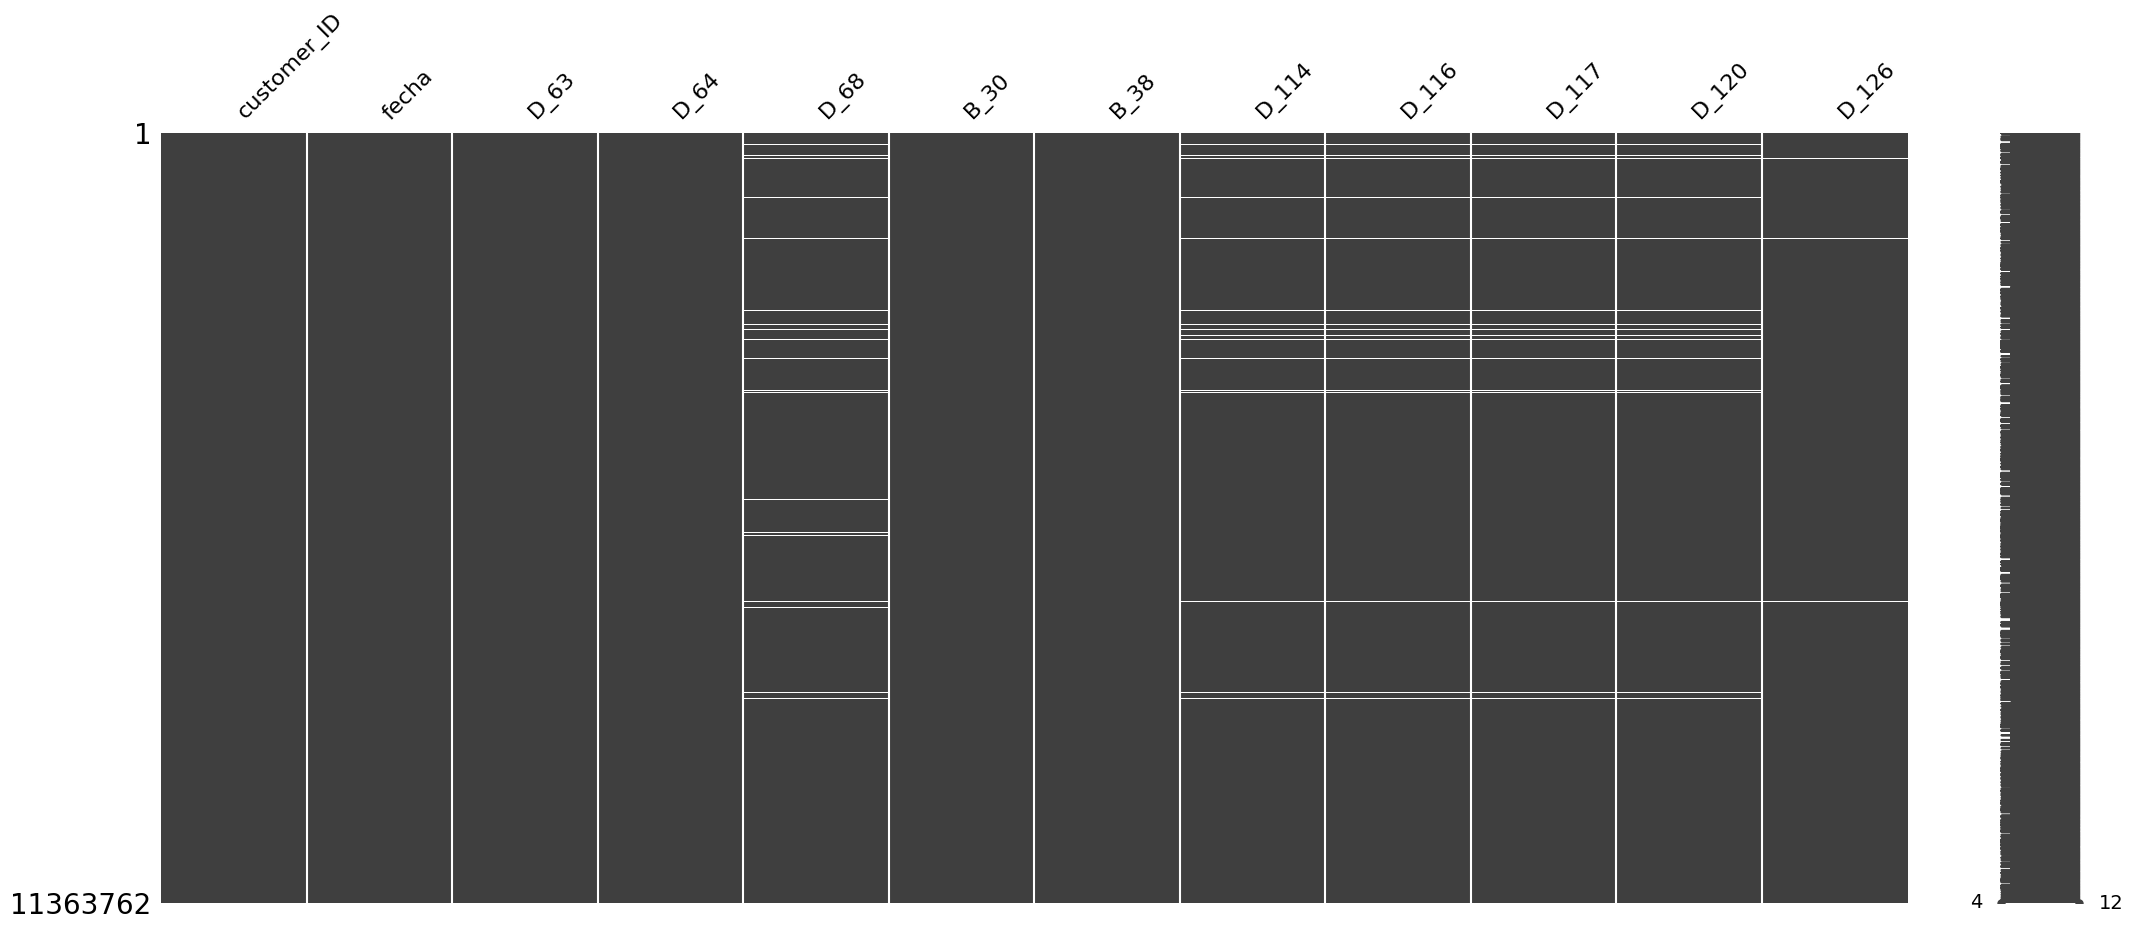

In [ ]:
# Visualizar los datos faltantes
msno.matrix(df_categorico)

***RESPUESTA CODIGO:***

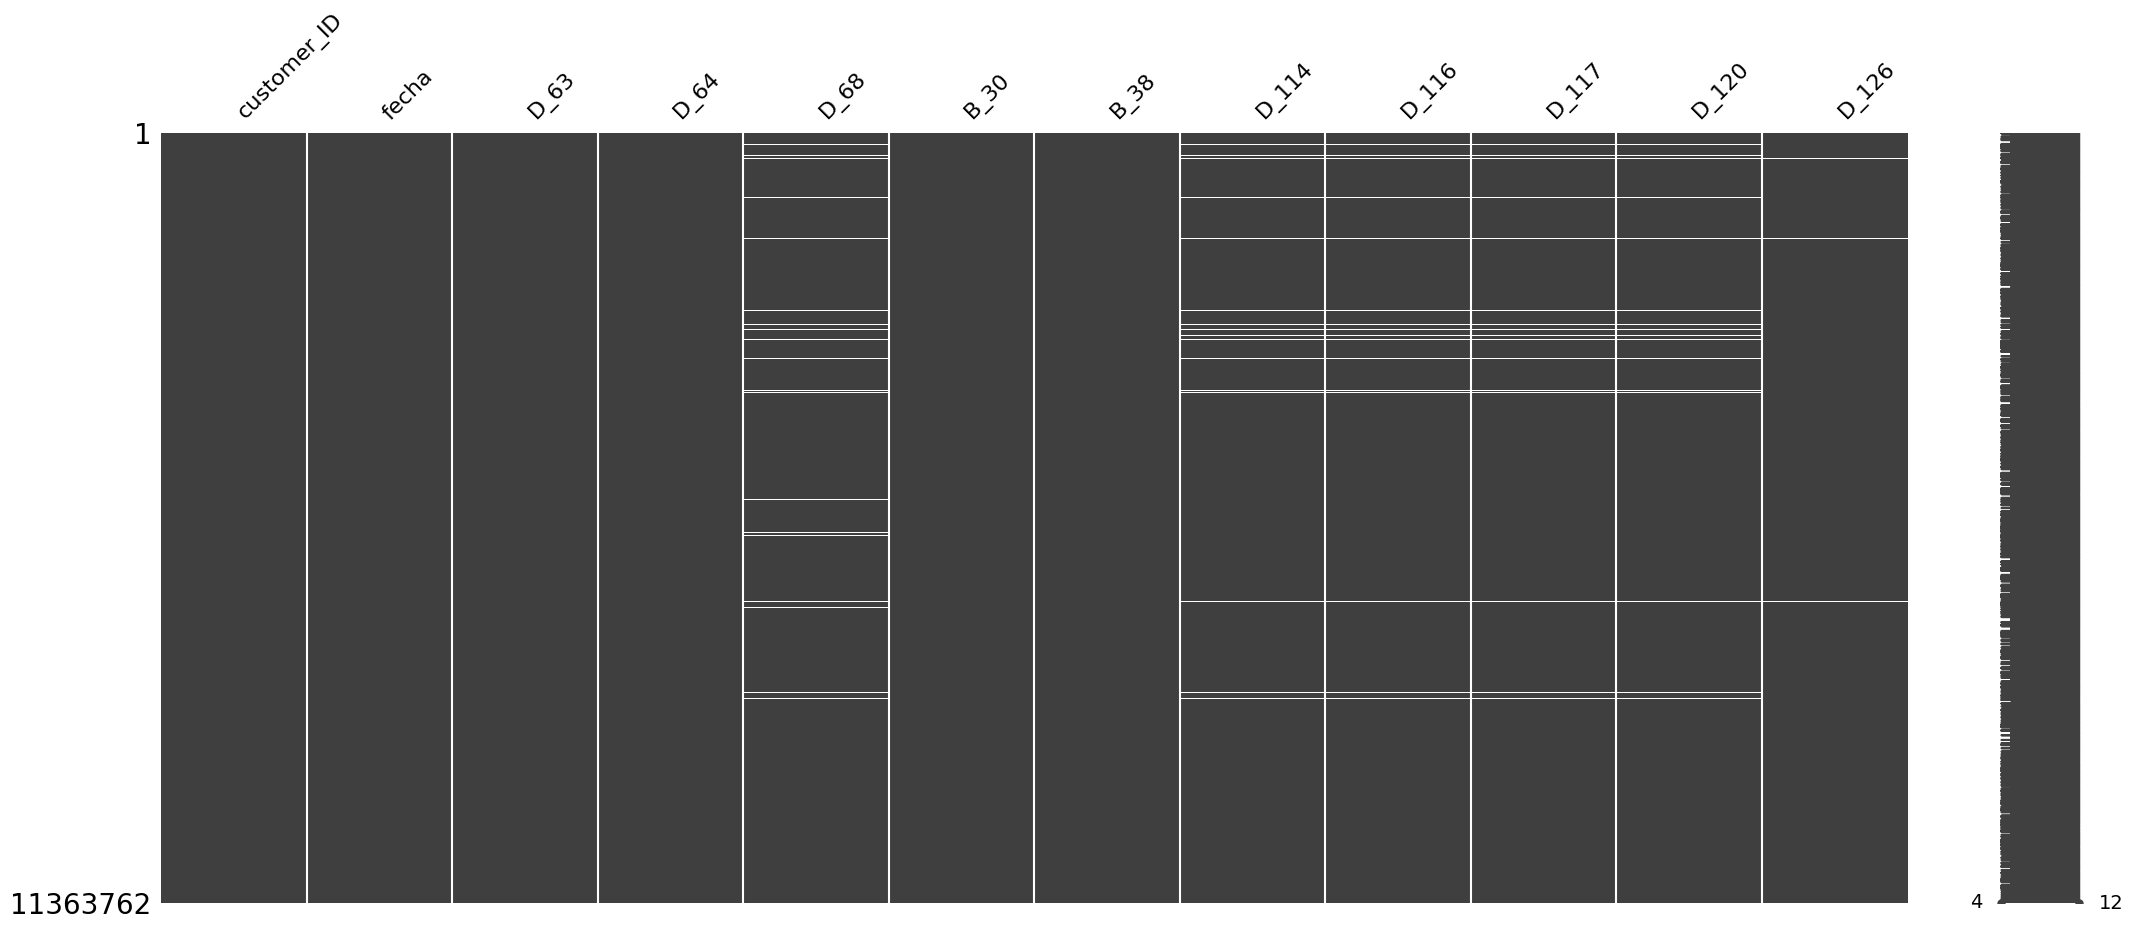


##  $\textit{Análisis de Valores Faltantes}$

1. **Variables con muchos faltantes**: Las columnas `D_68`, `D_114`, `D_116`, `D_117`, `D_120`, y `D_126` tienen una cantidad significativa de valores faltantes.
   
2. **Variables completas**: Columnas como `customer_ID`, `fecha`, `D_63`, `D_64`, `B_30`, y `B_38` no presentan faltantes.

3. **Patrones**: Los valores faltantes están dispersos a lo largo de las observaciones, sin un patrón claro.


$\textit{Limpieza de Datos 20% hasta 50% (NA'S)}$

In [ ]:
m_values_count = df_numeric.isnull().sum()

# Calcular el porcentaje de datos faltantes por columna
to_rows = df_numeric.shape[0]
m_percentage = (m_values_count / to_rows) * 100

# Crear un DataFrame para mostrar el conteo y porcentaje
m_data_summary = pd.DataFrame({
    'Datos Faltantes': m_values_count,
    'Porcentaje (%)': m_percentage
})

# Ordenar el DataFrame por el conteo de datos faltantes en orden descendente
m_data_summary = m_data_summary.sort_values(by='Datos Faltantes', ascending=False)

print(m_data_summary)

      Datos Faltantes  Porcentaje (%)
D_77          5572825       49.040318
S_9           3985374       35.070903
D_43          3412626       30.030777
S_27          2500275       22.002177
D_46          2297153       20.214723
...               ...             ...
B_32                0        0.000000
R_19                0        0.000000
S_19                0        0.000000
B_31                0        0.000000
B_23                0        0.000000

[149 rows x 2 columns]


***RESPUESTA CODIGO:***

```
      Datos Faltantes  Porcentaje (%)
D_77          5572825       49.040318
S_9           3985374       35.070903
D_43          3412626       30.030777
S_27          2500275       22.002177
D_46          2297153       20.214723
...               ...             ...
B_32                0        0.000000
R_19                0        0.000000
S_19                0        0.000000
B_31                0        0.000000
B_23                0        0.000000

[149 rows x 2 columns]
```



In [ ]:
# Filtrar columnas con 20% a 50% de datos faltantes
missing_20_to_50 = m_data_summary[(m_data_summary['Porcentaje (%)'] >= 20) & (m_data_summary['Porcentaje (%)'] < 50)]

# Ordenar los resultados por porcentaje en orden descendente
missing_20_to_50 = missing_20_to_50.sort_values(by='Porcentaje (%)', ascending=False)

for index, variable in enumerate(missing_20_to_50.index, start=1):
    # Extraer los datos faltants y el porcentaje de cada variable
    datos_faltantes = missing_20_to_50.loc[variable, 'Datos Faltantes']
    porcentaje = missing_20_to_50.loc[variable, 'Porcentaje (%)']

    print(f"{index}: {variable}, Datos Faltantes: {datos_faltantes}, Porcentaje: {porcentaje:.2f}%")

1: D_77, Datos Faltantes: 5572825, Porcentaje: 49.04%
2: S_9, Datos Faltantes: 3985374, Porcentaje: 35.07%
3: D_43, Datos Faltantes: 3412626, Porcentaje: 30.03%
4: S_27, Datos Faltantes: 2500275, Porcentaje: 22.00%
5: D_46, Datos Faltantes: 2297153, Porcentaje: 20.21%


***RESPUESTA CODIGO:***

```
1: D_77, Datos Faltantes: 5572825, Porcentaje: 49.04%
2: S_9, Datos Faltantes: 3985374, Porcentaje: 35.07%
3: D_43, Datos Faltantes: 3412626, Porcentaje: 30.03%
4: S_27, Datos Faltantes: 2500275, Porcentaje: 22.00%
5: D_46, Datos Faltantes: 2297153, Porcentaje: 20.21%
```



## $\textit{Análisis de Variables con 20\% a 50\% de Datos Faltantes}$

Las siguientes variables presentan entre un **20% y 50%** de datos faltantes. A partir de estos datos, evaluaremos si es adecuado imputar o eliminar estas variables, considerando su importancia y relación con el modelo.

1. **D_77** tiene el mayor porcentaje de datos faltantes (**49.04%**), lo que sugiere que podría ser una variable con poca información confiable. Esto podría indicar problemas sistémicos o datos faltantes por diseño.
   
2. **S_9** y **S_27** están relacionadas con gastos, y con porcentajes de datos faltantes de **35.07%** y **22.00%**, respectivamente. Estos podrían ser comportamientos inusuales, quizás asociados a un subconjunto de clientes atípicos. Eliminarlas podría estar justificado si no son representativas de la mayoría de la población.

3. **D_43** y **D_46**, con faltantes de **30.03%** y **20.21%**, son variables de la categoría **D**, que podrían estar relacionadas con eventos específicos. Si estas variables muestran una correlación baja con la variable objetivo, sería razonable considerar su eliminación.

En resumen, realizaremos un análisis de **correlación** para determinar si estas variables influyen significativamente en la variable objetivo. Dependiendo de los resultados, decidiremos si imputarlas o eliminarlas del conjunto de datos.

In [ ]:
df_cleaned_p = df_numeric[['D_77', 'S_9', 'D_43', 'S_27', 'D_46' ]]


In [ ]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11363762 entries, 0 to 11363761
Columns: 149 entries, P_2 to D_145
dtypes: float16(149)
memory usage: 3.2 GB


***RESPUESTA CODIGO:***

```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11363762 entries, 0 to 11363761
Columns: 149 entries, P_2 to D_145
dtypes: float16(149)
memory usage: 3.2 GB
```



$\textit{Análisis de la Matriz de Correlación}$

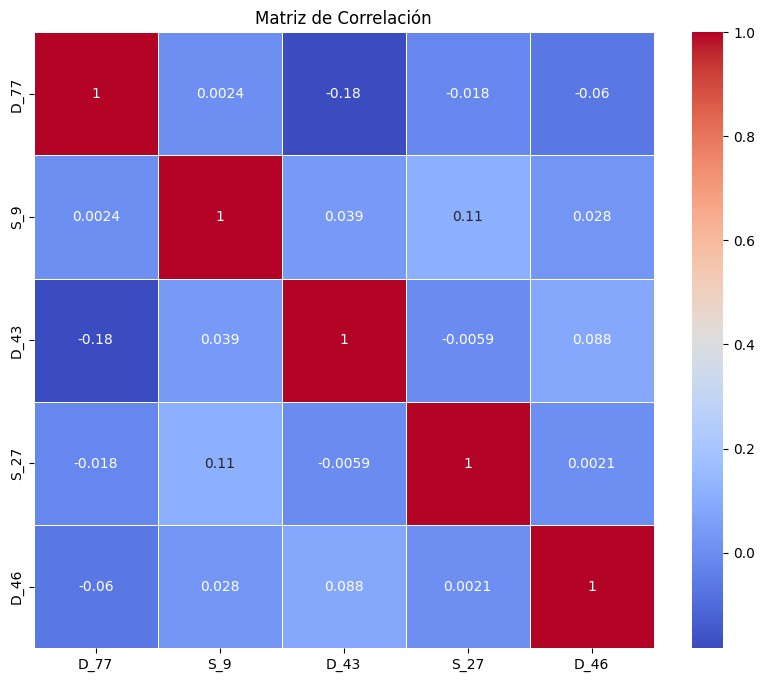

In [ ]:
df_numerico = df_cleaned_p.select_dtypes(include=[np.number])

# Verifica si hay columnas numéricas antes de continuar
if df_numerico.shape[1] > 0:
    # Calcular la matriz de correlación
    corr_matrix = df_numerico.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Matriz de Correlación')
    plt.show()
else:
    print("No hay columnas numéricas en el DataFrame para calcular la correlación.")


***RESPUESTA CODIGO:***
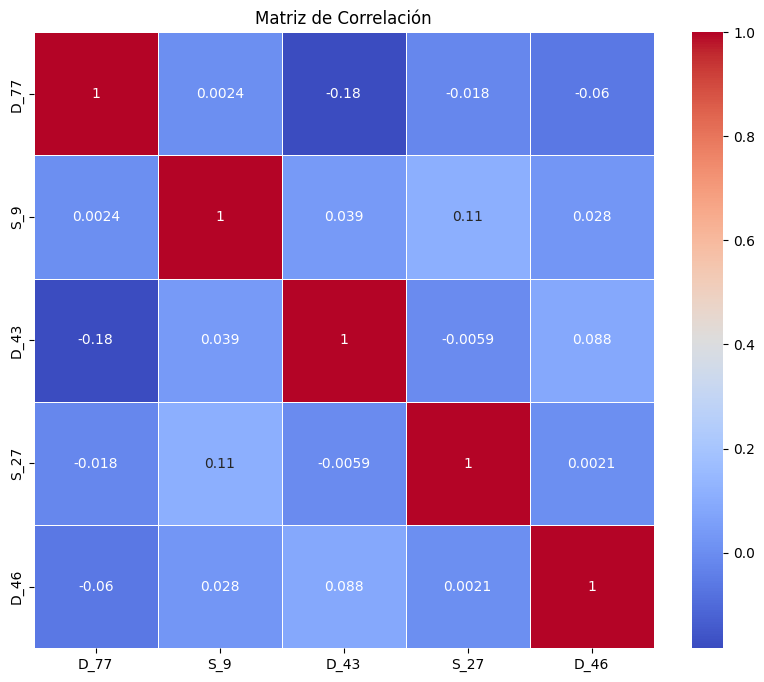

## $\textit{Análisis de la Matriz de Correlación}$

- **D_77**: Correlación de -0.18 (negativa baja)
- **S_9**: Correlación de 0.0024 a -0.11
- **D_43**: Correlación de 0.088 a -0.18
- **S_27**: Correlación de -0.0059 a 0.11
- **D_46**: Correlación de 0.088 a -0.06

## $\textit{Decisiones:}$

- **S_9**: Con correlaciones muy bajas (en torno a 0.0024), no parece relevante para el modelo. Consideramos eliminarla.
  
- **S_27**: Al tener correlaciones débiles (como -0.0059), esta variable podría ser eliminada, ya que no aporta información significativa.
  
- **D_43**: Presenta una correlación baja tanto positiva como negativa, lo que también justifica su posible eliminación.
  
- **D_46**: Su baja correlación (0.088) sugiere que no añade mucho valor y podría ser eliminada.

- **D_77**: Aunque tiene una correlación negativa leve (-0.18), la falta de una relación clara con las demás variables sugiere que podría ser eliminada del análisis.

In [ ]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11363762 entries, 0 to 11363761
Columns: 149 entries, P_2 to D_145
dtypes: float16(149)
memory usage: 3.2 GB


***RESPUESTA CODIGO:***

```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11363762 entries, 0 to 11363761
Columns: 149 entries, P_2 to D_145
dtypes: float16(149)
memory usage: 3.2 GB
```



Hasta el momento, tras los análisis realizados, hemos reducido nuestra base de datos a 149 variables, disminuyendo desde un total de 191.

In [ ]:
# Definir las variables a eliminar
variables_too_drop = ['D_77', 'S_9', 'D_43', 'S_27', 'D_46']

# Eliminar las variables del DataFrame
df_numeric_c = df_numeric.drop(columns=variables_too_drop)

print(df_numeric_c.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11363762 entries, 0 to 11363761
Columns: 144 entries, P_2 to D_145
dtypes: float16(144)
memory usage: 3.0 GB
None


***RESPUESTA CODIGO:***

```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11363762 entries, 0 to 11363761
Columns: 144 entries, P_2 to D_145
dtypes: float16(144)
memory usage: 3.0 GB
None
```



## $\textit{Decisión de Imputación Iterativa Múltiple}$

In [ ]:
missing_count = df_numeric_c.isnull().sum().sum()
print('Total missing values in df_numeric: %d' % missing_count)

Total missing values in df_numeric: 16844462


***RESPUESTA CODIGO:***

```
Total missing values in df_numeric: 16844462
```



**Decisión sobre la Imputación**

Dado el alto volumen de datos a imputar y tras haber probado la imputación iterativa múltiple sin éxito, optamos por analizar las variables de nuestro DataFrame de manera individual antes de proceder con la imputación. No obstante, para aplicar este enfoque, es importante examinar si los valores faltantes (NA's) muestran patrones distintos. Así, podremos evitar posibles complicaciones al modificar cómo se tratan estos NA's.


In [ ]:
d_count = len([col for col in df_numeric_c.columns if col.startswith('D_')])
s_count = len([col for col in df_numeric_c.columns if col.startswith('S_')])
p_count = len([col for col in df_numeric_c.columns if col.startswith('P_')])
b_count = len([col for col in df_numeric_c.columns if col.startswith('B_')])
r_count = len([col for col in df_numeric_c.columns if col.startswith('R_')])


print(f"Número de variables D_*: {d_count}")
print(f"Número de variables S_*: {s_count}")
print(f"Número de variables P_*: {p_count}")
print(f"Número de variables B_*: {b_count}")
print(f"Número de variables R_*: {r_count}")

Número de variables D_*: 62
Número de variables S_*: 19
Número de variables P_*: 3
Número de variables B_*: 34
Número de variables R_*: 26


***RESPUESTA CODIGO:***

```
Número de variables D_*: 62
Número de variables S_*: 19
Número de variables P_*: 3
Número de variables B_*: 34
Número de variables R_*: 26
```



In [ ]:
# Supongamos que df_numeric_c es tu DataFrame limpio sin las variables eliminadas.
variables_types = {
    'D': [col for col in df_numeric_c.columns if col.startswith('D_')],
    'S': [col for col in df_numeric_c.columns if col.startswith('S_')],
    'P': [col for col in df_numeric_c.columns if col.startswith('P_')],
    'B': [col for col in df_numeric_c.columns if col.startswith('B_')],
    'R': [col for col in df_numeric_c.columns if col.startswith('R_')]
}

# Crear una lista para almacenar los resultados
missing_summary_list = []

for var_type, columns in variables_types.items():
    for column in columns:
        missing_count = df_numeric_c[column].isnull().sum()
        missing_percentage = (missing_count / len(df_numeric_c)) * 100
        missing_summary_list.append({
            'Variable Type': var_type,
            'Variable Name': column,
            'Missing Count': missing_count,
            'Missing Percentage': missing_percentage
        })

# Crear un DataFrame a partir de la lista
missing_summary = pd.DataFrame(missing_summary_list)

# Mostrar el resumen de datos faltantes
print(missing_summary)

    Variable Type Variable Name  Missing Count  Missing Percentage
0               D          D_39              0            0.000000
1               D          D_41           2917            0.025669
2               D          D_44         538165            4.735800
3               D          D_45           2978            0.026206
4               D          D_47              0            0.000000
..            ...           ...            ...                 ...
139             R          R_23              0            0.000000
140             R          R_24              0            0.000000
141             R          R_25              0            0.000000
142             R          R_27         663504            5.838771
143             R          R_28              0            0.000000

[144 rows x 4 columns]


***RESPUESTA CODIGO:***

```
    Variable Type Variable Name  Missing Count  Missing Percentage
0               D          D_39              0            0.000000
1               D          D_41           2917            0.025669
2               D          D_44         538165            4.735800
3               D          D_45           2978            0.026206
4               D          D_47              0            0.000000
..            ...           ...            ...                 ...
139             R          R_23              0            0.000000
140             R          R_24              0            0.000000
141             R          R_25              0            0.000000
142             R          R_27         663504            5.838771
143             R          R_28              0            0.000000

[144 rows x 4 columns]
```



$\textit{Análisis de NA'S por Tipo de Variable}$

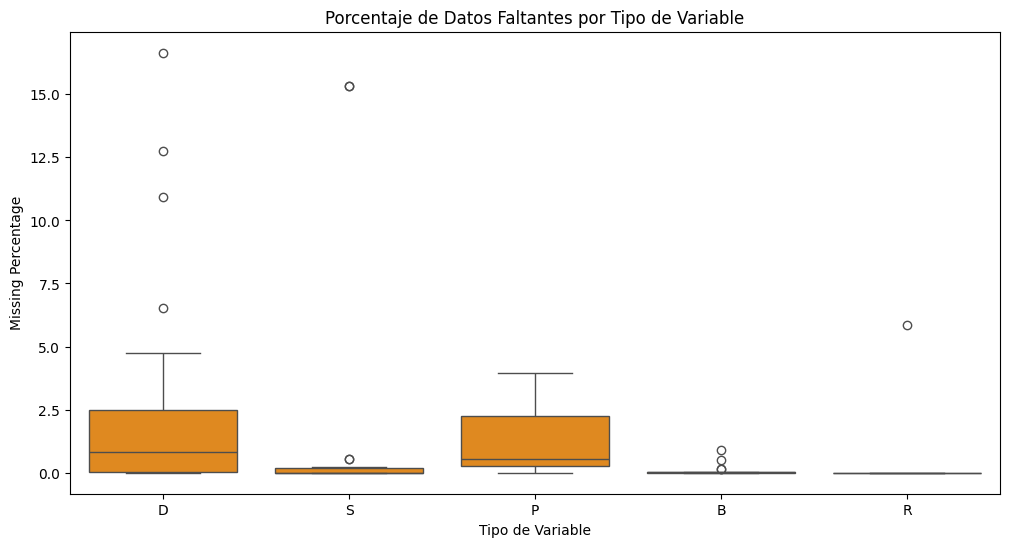

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Variable Type', y='Missing Percentage', data=missing_summary, color="darkorange")
plt.xlabel('Tipo de Variable')
plt.title('Porcentaje de Datos Faltantes por Tipo de Variable')
plt.show()

***RESPUESTA CODIGO:***

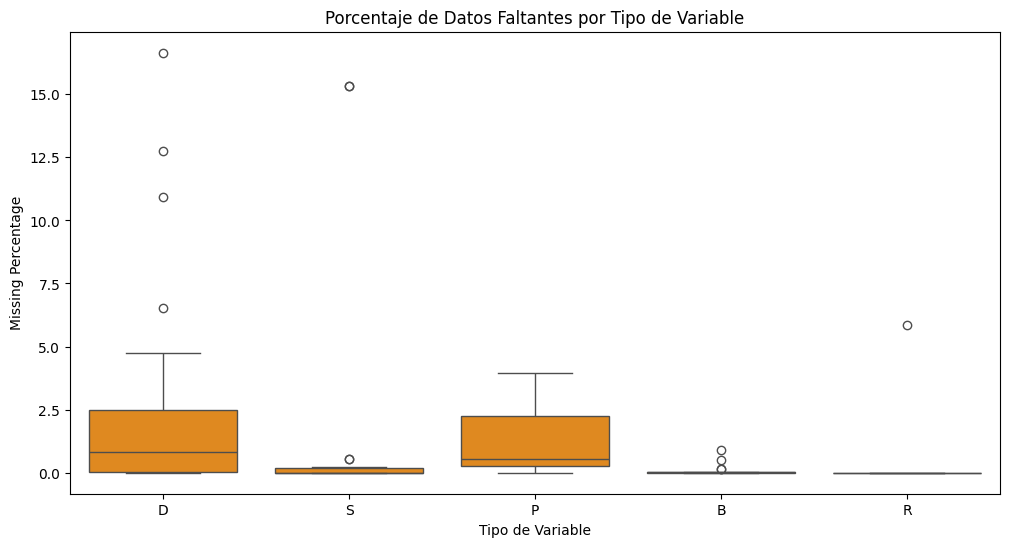


Podemos observar que el comportamiento de los datos faltantes varía según la categoría de variable:

- **D (Datos Generales)**: Presenta un rango amplio de datos faltantes con varios valores atípicos. Esto indica que algunas variables dentro de esta categoría tienen problemas significativos con la falta de datos.
  
- **S (Seguridad)**: Tiene un porcentaje bajo de datos faltantes, lo que sugiere que la mayoría de las variables en esta categoría tienen datos relativamente completos.

- **P (Personales)** y **B (Balance)**: Estas categorías muestran una cantidad muy baja de datos faltantes, lo que indica una alta integridad de los datos.

- **R (Registros)**: Similar a las categorías **P** y **B**, los datos faltantes son mínimos, sugiriendo que no hay problemas considerables de datos faltantes en esta categoría.

Validaremos estadísticamente estas diferencias usando una prueba de Chi-cuadrado para determinar si las proporciones de datos faltantes varían significativamente entre categorías.

## $\textbf{\textit{Test de Chi cuadrado}}$


$\textit{Hipótesis nula (H₀):}$
*No hay diferencias significativas en la distribución de los valores faltantes entre las diferentes variables. Por lo tanto, los datos faltantes pueden ser imputados de manera conjunta.*

$\textit{Hipótesis alternativa (H₁):}$
*Existen diferencias significativas en la distribución de los valores faltantes entre las diferentes variables. Por lo tanto, los datos faltantes se pueden imputar de manera iterativa y por separado.*

In [ ]:
from scipy.stats import chi2_contingency

missing_counts = missing_summary.groupby('Variable Type')['Missing Count'].sum()
total_counts = missing_summary.groupby('Variable Type')['Variable Name'].count()

# Calcular la proporción de datos faltantes
missing_proportions = (missing_counts / total_counts).reset_index(name='Proportion')

# Crear una tabla de contingencia
contingency_table = pd.DataFrame({
    'Type': missing_proportions['Variable Type'],
    'Missing': missing_counts.values,
    'Total': total_counts.values,
    'Proportion': missing_proportions['Proportion']
})

print(contingency_table)

  Type   Missing  Total     Proportion
0    B    229460     34    6748.823529
1    D  11793208     62  190213.032258
2    P    508457      3  169485.666667
3    R    663504     26   25519.384615
4    S   3649833     19  192096.473684


***RESPUESTA CODIGO:***

```
  Type   Missing  Total     Proportion
0    B    229460     34    6748.823529
1    D  11793208     62  190213.032258
2    P    508457      3  169485.666667
3    R    663504     26   25519.384615
4    S   3649833     19  192096.473684
```



In [ ]:
# Crear una tabla de contingencia para la prueba de Chi-cuadrado
observed = contingency_table[['Missing', 'Total']].values

# Aplicar la prueba de Chi-cuadrado
chi2, p_value, _, _ = chi2_contingency(observed)

print(f"Chi-cuadrado: {chi2:.4f}")
print(f"Valor p: {p_value:.4f}")

if p_value < 0.05:
    print("Las diferencias en los porcentajes de datos faltantes son estadísticamente significativas.")
else:
    print("No hay diferencias estadísticamente significativas en los porcentajes de datos faltantes.")

Chi-cuadrado: 616.1789
Valor p: 0.0000
Las diferencias en los porcentajes de datos faltantes son estadísticamente significativas.


***RESPUESTA CODIGO:***

```
Chi-cuadrado: 616.1789
Valor p: 0.0000
Las diferencias en los porcentajes de datos faltantes son estadísticamente significativas.
```



**Análisis de Datos Faltantes y Resultados del Test Chi-Cuadrado**

El test Chi-cuadrado ha dado un estadístico de **616.1789** y un valor p de **0.0000**, lo que indica que existen diferencias significativas en los porcentajes de datos faltantes entre los diferentes tipos de variables.

Dado que el valor p es menor a **0.05**, rechazamos la hipótesis nula (H₀), lo que confirma que el patrón de los datos faltantes varía entre los distintos tipos de variables.

**Conclusión:**
Los resultados del test Chi-cuadrado muestran que las diferencias en los porcentajes de datos faltantes entre los tipos de variables son significativas. Esto sugiere que es recomendable abordar la imputación de los datos faltantes de manera separada para cada tipo de variable, teniendo en cuenta sus características particulares, para evitar introducir sesgos en los análisis posteriores.

$\textit{Imputación iterativa múltiple}$

In [ ]:
# Imputación Iterativa por separado
def impute_variables(df, variables):
    imputer = IterativeImputer(n_nearest_features=None, imputation_order='ascending')
    data = df[variables].values
    imputed_data = imputer.fit_transform(data)
    return pd.DataFrame(imputed_data, columns=variables)

# Imputar cada tipo de variable
df_s_imputed = impute_variables(df_numeric_c, variables_types['S'])
df_p_imputed = impute_variables(df_numeric_c, variables_types['P'])
df_b_imputed = impute_variables(df_numeric_c, variables_types['B'])
df_r_imputed = impute_variables(df_numeric_c, variables_types['R'])

# Combinar los DataFrames imputados
df_imputed = pd.concat([df_s_imputed, df_p_imputed, df_b_imputed, df_r_imputed], axis=1)

missing_count = sum(np.isnan(df_imputed.values.flatten()))
print('Missing after imputation: %d' % missing_count)



Missing after imputation: 0


***RESPUESTA CODIGO:***

```
Missing after imputation: 0
```



##  $\textit{Método de Imputación por Media/Mediana}$

In [ ]:
variables_d = variables_types['D']
df_d = df_numeric_c[variables_d]

$\textit{Planteamiento de Hipótesis para la Prueba de Kolmogorov-Smirnov}$

$\textit{Hipótesis Nula (H0):}$
La distribución de los datos de la variable \(D_* \) es normal. Esto significa que podemos imputar los datos faltantes utilizando la **media**.

$\textit{Hipótesis Alternativa (H1):}$
La distribución de los datos de la variable \(D_* \) no es normal. Esto indica que debemos imputar los datos faltantes utilizando la **mediana**.

$\textit{Decisión:}$
- Si el valor p de la prueba de Kolmogorov-Smirnov es mayor que 0.05, no rechazamos la hipótesis nula (H0) y consideramos que la media es un método adecuado para la imputación.
- Si el valor p es menor o igual a 0.05, rechazamos la hipótesis nula (H0) y aceptamos la hipótesis alternativa (H1), utilizando la mediana para la imputación de datos faltantes.


In [ ]:
ks_results = {}

for variable in df_d.columns:
    values = df_d[variable].dropna()

    normal_sample = np.random.normal(loc=np.mean(values), scale=np.std(values), size=len(values))
    statistic, p_value = ks_2samp(values, normal_sample)

    ks_results[variable] = {
        'KS Statistic': statistic,
        'p-value': p_value,
        'Imputation Method': 'Media' if p_value > 0.05 else 'Mediana'
    }

ks_results_df = pd.DataFrame(ks_results).T
print(ks_results_df)

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:731: RuntimeWarning: invalid value encountered in scalar divide
  the_mean = the_sum / count if count > 0 else np.nan
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1019: RuntimeWarning: invalid value encountered in scalar divide
  result = sqr.sum(axis=axis, dtype=np.float64) / d


      KS Statistic p-value Imputation Method
D_39           NaN     NaN           Mediana
D_41           NaN     NaN           Mediana
D_44           NaN     NaN           Mediana
D_45           NaN     NaN           Mediana
D_47           NaN     NaN           Mediana
...            ...     ...               ...
D_140          NaN     NaN           Mediana
D_141          NaN     NaN           Mediana
D_143          NaN     NaN           Mediana
D_144          NaN     NaN           Mediana
D_145          NaN     NaN           Mediana

[62 rows x 3 columns]


***RESPUESTA CODIGO:***

```

      KS Statistic p-value Imputation Method
D_39           NaN     NaN           Mediana
D_41           NaN     NaN           Mediana
D_44           NaN     NaN           Mediana
D_45           NaN     NaN           Mediana
D_47           NaN     NaN           Mediana
...            ...     ...               ...
D_140          NaN     NaN           Mediana
D_141          NaN     NaN           Mediana
D_143          NaN     NaN           Mediana
D_144          NaN     NaN           Mediana
D_145          NaN     NaN           Mediana

[62 rows x 3 columns]
```



In [ ]:
imputation_summary = ks_results_df['Imputation Method'].value_counts()

print(imputation_summary)

Imputation Method
Mediana    62
Name: count, dtype: int64


***RESPUESTA CODIGO:***

```
Imputation Method
Mediana    62
Name: count, dtype: int64
```



Podemos observar que, durante la prueba de Kolmogorov-Smirnov, todas las variables que corresponden a D indican que se deben reemplazar los datos faltantes con la mediana.

## $\textit{Prueba de Anderson-Darling}$

In [ ]:
from scipy.stats import anderson

In [ ]:
normality_results = {}

for variable in df_d.columns:
    values = df_d[variable].dropna()

    # Realizar la prueba de Anderson-Darling
    statistic, critical_values, significance_level = anderson(values, dist='norm')

    normality_results[variable] = {
        'Anderson-Darling Statistic': statistic,
        'Critical Values': critical_values,
        'Significance Level': significance_level
    }

normality_results_df = pd.DataFrame(normality_results).T
print(normality_results_df)

for variable in normality_results:
    statistic = normality_results[variable]['Anderson-Darling Statistic']
    critical_values = normality_results[variable]['Critical Values']

    if statistic < critical_values[0]:
        print(f'La variable {variable} SI sigue una distribución normal (AD Statistic: {statistic:.4f})')
    else:
        print(f'La variable {variable} NO sigue una distribución normal (AD Statistic: {statistic:.4f})')

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:731: RuntimeWarning: invalid value encountered in scalar divide
  the_mean = the_sum / count if count > 0 else np.nan
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1019: RuntimeWarning: invalid value encountered in scalar divide
  result = sqr.sum(axis=axis, dtype=np.float64) / d


      Anderson-Darling Statistic                      Critical Values  \
D_39                         NaN  [0.576, 0.656, 0.787, 0.918, 1.092]   
D_41                         NaN  [0.576, 0.656, 0.787, 0.918, 1.092]   
D_44                         NaN  [0.576, 0.656, 0.787, 0.918, 1.092]   
D_45                         NaN  [0.576, 0.656, 0.787, 0.918, 1.092]   
D_47                         NaN  [0.576, 0.656, 0.787, 0.918, 1.092]   
...                          ...                                  ...   
D_140                        NaN  [0.576, 0.656, 0.787, 0.918, 1.092]   
D_141                        NaN  [0.576, 0.656, 0.787, 0.918, 1.092]   
D_143                        NaN  [0.576, 0.656, 0.787, 0.918, 1.092]   
D_144                        NaN  [0.576, 0.656, 0.787, 0.918, 1.092]   
D_145                        NaN  [0.576, 0.656, 0.787, 0.918, 1.092]   

                Significance Level  
D_39   [15.0, 10.0, 5.0, 2.5, 1.0]  
D_41   [15.0, 10.0, 5.0, 2.5, 1.0]  
D_44   [15.0

***RESPUESTA CODIGO:***

```
      Anderson-Darling Statistic                      Critical Values  \
D_39                         NaN  [0.576, 0.656, 0.787, 0.918, 1.092]   
D_41                         NaN  [0.576, 0.656, 0.787, 0.918, 1.092]   
D_44                         NaN  [0.576, 0.656, 0.787, 0.918, 1.092]   
D_45                         NaN  [0.576, 0.656, 0.787, 0.918, 1.092]   
D_47                         NaN  [0.576, 0.656, 0.787, 0.918, 1.092]   
...                          ...                                  ...   
D_140                        NaN  [0.576, 0.656, 0.787, 0.918, 1.092]   
D_141                        NaN  [0.576, 0.656, 0.787, 0.918, 1.092]   
D_143                        NaN  [0.576, 0.656, 0.787, 0.918, 1.092]   
D_144                        NaN  [0.576, 0.656, 0.787, 0.918, 1.092]   
D_145                        NaN  [0.576, 0.656, 0.787, 0.918, 1.092]   

                Significance Level  
D_39   [15.0, 10.0, 5.0, 2.5, 1.0]  
D_41   [15.0, 10.0, 5.0, 2.5, 1.0]  
D_44   [15.0, 10.0, 5.0, 2.5, 1.0]  
D_45   [15.0, 10.0, 5.0, 2.5, 1.0]  
D_47   [15.0, 10.0, 5.0, 2.5, 1.0]  
...                            ...  
D_140  [15.0, 10.0, 5.0, 2.5, 1.0]  
D_141  [15.0, 10.0, 5.0, 2.5, 1.0]  
D_143  [15.0, 10.0, 5.0, 2.5, 1.0]  
D_144  [15.0, 10.0, 5.0, 2.5, 1.0]  
D_145  [15.0, 10.0, 5.0, 2.5, 1.0]  

[62 rows x 3 columns]
La variable D_39 NO sigue una distribución normal (AD Statistic: nan)
La variable D_41 NO sigue una distribución normal (AD Statistic: nan)
La variable D_44 NO sigue una distribución normal (AD Statistic: nan)
La variable D_45 NO sigue una distribución normal (AD Statistic: nan)
La variable D_47 NO sigue una distribución normal (AD Statistic: nan)
La variable D_48 NO sigue una distribución normal (AD Statistic: nan)
La variable D_51 NO sigue una distribución normal (AD Statistic: nan)
La variable D_52 NO sigue una distribución normal (AD Statistic: nan)
La variable D_54 NO sigue una distribución normal (AD Statistic: nan)
La variable D_55 NO sigue una distribución normal (AD Statistic: nan)
La variable D_58 NO sigue una distribución normal (AD Statistic: nan)
La variable D_59 NO sigue una distribución normal (AD Statistic: nan)
La variable D_60 NO sigue una distribución normal (AD Statistic: nan)
La variable D_61 NO sigue una distribución normal (AD Statistic: nan)
La variable D_62 NO sigue una distribución normal (AD Statistic: nan)
La variable D_65 NO sigue una distribución normal (AD Statistic: nan)
La variable D_69 NO sigue una distribución normal (AD Statistic: nan)
La variable D_70 NO sigue una distribución normal (AD Statistic: nan)
La variable D_71 NO sigue una distribución normal (AD Statistic: nan)
La variable D_72 NO sigue una distribución normal (AD Statistic: nan)
La variable D_74 NO sigue una distribución normal (AD Statistic: nan)
La variable D_75 NO sigue una distribución normal (AD Statistic: nan)
La variable D_78 NO sigue una distribución normal (AD Statistic: nan)
La variable D_79 NO sigue una distribución normal (AD Statistic: nan)
La variable D_80 NO sigue una distribución normal (AD Statistic: nan)
La variable D_81 NO sigue una distribución normal (AD Statistic: nan)
La variable D_83 NO sigue una distribución normal (AD Statistic: nan)
La variable D_84 NO sigue una distribución normal (AD Statistic: nan)
La variable D_86 NO sigue una distribución normal (AD Statistic: nan)
La variable D_89 NO sigue una distribución normal (AD Statistic: nan)
La variable D_91 NO sigue una distribución normal (AD Statistic: nan)
La variable D_92 NO sigue una distribución normal (AD Statistic: nan)
La variable D_93 NO sigue una distribución normal (AD Statistic: nan)
La variable D_94 NO sigue una distribución normal (AD Statistic: nan)
La variable D_96 NO sigue una distribución normal (AD Statistic: nan)
La variable D_102 NO sigue una distribución normal (AD Statistic: nan)
La variable D_103 NO sigue una distribución normal (AD Statistic: nan)
La variable D_104 NO sigue una distribución normal (AD Statistic: nan)
La variable D_107 NO sigue una distribución normal (AD Statistic: nan)
La variable D_109 NO sigue una distribución normal (AD Statistic: nan)
La variable D_112 NO sigue una distribución normal (AD Statistic: nan)
La variable D_113 NO sigue una distribución normal (AD Statistic: nan)
La variable D_115 NO sigue una distribución normal (AD Statistic: nan)
La variable D_118 NO sigue una distribución normal (AD Statistic: nan)
La variable D_119 NO sigue una distribución normal (AD Statistic: nan)
La variable D_121 NO sigue una distribución normal (AD Statistic: nan)
La variable D_122 NO sigue una distribución normal (AD Statistic: nan)
La variable D_123 NO sigue una distribución normal (AD Statistic: nan)
La variable D_124 NO sigue una distribución normal (AD Statistic: nan)
La variable D_125 NO sigue una distribución normal (AD Statistic: nan)
La variable D_127 NO sigue una distribución normal (AD Statistic: nan)
La variable D_128 NO sigue una distribución normal (AD Statistic: nan)
La variable D_129 NO sigue una distribución normal (AD Statistic: nan)
La variable D_130 NO sigue una distribución normal (AD Statistic: nan)
La variable D_131 NO sigue una distribución normal (AD Statistic: nan)
La variable D_133 NO sigue una distribución normal (AD Statistic: nan)
La variable D_139 NO sigue una distribución normal (AD Statistic: nan)
La variable D_140 NO sigue una distribución normal (AD Statistic: nan)
La variable D_141 NO sigue una distribución normal (AD Statistic: nan)
La variable D_143 NO sigue una distribución normal (AD Statistic: nan)
La variable D_144 NO sigue una distribución normal (AD Statistic: nan)
La variable D_145 NO sigue una distribución normal (AD Statistic: nan)
```



## $\textit{Análisis de Resultados}$

La prueba de Anderson-Darling es utilizada para verificar si los datos de ciertas variables siguen una distribución normal.

## $\textit{Resultados de la Prueba}$

- **Estadística de Anderson-Darling**: Esta estadística mide qué tan alejados están los datos de una distribución normal. En este caso, las variables analizadas tienen un valor de NaN (no disponible), lo que indica que los datos no siguen una distribución normal.

- **Valores Críticos**: Los valores críticos varían según los niveles de significancia (15%, 10%, 5%, 2.5%, y 1%) y ayudan a determinar si hay una desviación significativa de la normalidad.

## $\textit{Conclusiones}$

- **Todas las variables analizadas presentan una estadística de Anderson-Darling de NaN**, lo que sugiere que **ninguna de estas variables sigue una distribución normal**.

## $\textit{Implicaciones}$

Dado que los resultados muestran que ninguna de las variables sigue una distribución normal, sería inapropiado aplicar métodos de imputación que asuman normalidad, como la imputación basada en la media. Por lo tanto, se deben considerar métodos de imputación más robustos, como la mediana o imputación basada en distribuciones no paramétricas.



Obtienes `NaN` en los resultados de las pruebas debido a problemas relacionados con **desbordamiento numérico** y **operaciones inválidas** con los valores de tus datos. Esto ocurre cuando los valores numéricos que estás manipulando son **extremadamente grandes o extremadamente pequeños**, lo que lleva a que las operaciones aritméticas, como la suma, la media o la varianza, no se realicen correctamente. Cuando el rango numérico excede los límites que los tipos de datos pueden manejar, se producen desbordamientos que generan resultados inválidos como `NaN`.

In [ ]:
missing_count = df_imputed.isnull().sum().sum()
print('Total missing values in df_numeric: %d' % missing_count)

Total missing values in df_numeric: 0


***RESPUESTA CODIGO:***

```
Total missing values in df_numeric: 0
```



Vemos que nuestro DataFrame, que contiene las variables:

- **S_***: Variables de gasto
- **P_***: Variables de pago
- **B_***: Variables de saldo
- **R_***: Variables de riesgo

Además, la columna **target** contiene ya 0 datos faltantes (NA's).

In [ ]:
missing_count = df_d.isnull().sum().sum()
print('Total missing values in df_numeric: %d' % missing_count)

Total missing values in df_numeric: 11793208


***RESPUESTA CODIGO:***

```
Total missing values in df_numeric: 11793208
```



Vemos que de las variables numéricas nos quedan **11,793,208** datos faltantes, todos estos pertenecientes a las variables de delincuencia.


$\textit{**Imputacion de los datos con mediana.**}$

In [ ]:
# Crear el imputador con la mediana
imputer = SimpleImputer(strategy='median')
df_d_imputed = imputer.fit_transform(df_d)
df_d_imputed = pd.DataFrame(df_d_imputed, columns=variables_d)

missing_count = sum(np.isnan(df_d_imputed.values.flatten()))
print('Missing after imputation for D variables: %d' % missing_count)

Missing after imputation for D variables: 0


***RESPUESTA CODIGO:***

```
Missing after imputation for D variables: 0
```



In [ ]:
df_combined = pd.concat([df_imputed, df_d_imputed], axis=1)

print(df_combined.info())
print(df_categorico.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11363762 entries, 0 to 11363761
Columns: 144 entries, S_3 to D_145
dtypes: float16(144)
memory usage: 3.0 GB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11363762 entries, 0 to 11363761
Data columns (total 12 columns):
 #   Column       Dtype         
---  ------       -----         
 0   customer_ID  object        
 1   fecha        datetime64[ns]
 2   D_63         category      
 3   D_64         category      
 4   D_68         category      
 5   B_30         category      
 6   B_38         category      
 7   D_114        category      
 8   D_116        category      
 9   D_117        category      
 10  D_120        category      
 11  D_126        category      
dtypes: category(10), datetime64[ns](1), object(1)
memory usage: 281.8+ MB
None


***RESPUESTA CODIGO:***

```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11363762 entries, 0 to 11363761
Columns: 144 entries, S_3 to D_145
dtypes: float16(144)
memory usage: 3.0 GB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11363762 entries, 0 to 11363761
Data columns (total 12 columns):
 #   Column       Dtype         
---  ------       -----         
 0   customer_ID  object        
 1   fecha        datetime64[ns]
 2   D_63         category      
 3   D_64         category      
 4   D_68         category      
 5   B_30         category      
 6   B_38         category      
 7   D_114        category      
 8   D_116        category      
 9   D_117        category      
 10  D_120        category      
 11  D_126        category      
dtypes: category(10), datetime64[ns](1), object(1)
memory usage: 281.8+ MB
None
```



Podemos ver que ya tenemos nuestro DataFrame de variables numéricas sin datos faltantes y que aún continuamos con la misma cantidad de filas. Ahora procederemos a hacer la imputación para los datos categóricos.


$\textit{Análisis de Datos Faltantes Categoricos}$

In [ ]:
missing_before_imputation = df_categorico.isnull().sum().sum()
print(f'Missing before imputation in categorical DataFrame: {missing_before_imputation}')

Missing before imputation in categorical DataFrame: 1573695


***RESPUESTA CODIGO:***

```
Missing before imputation in categorical DataFrame: 1573695
```



In [ ]:
# Contar los datos faltantes por columna
missing_values_count = df_categorico.isnull().sum()
total_rows = df_categorico.shape[0]
missing_percentage = (missing_values_count / total_rows) * 100

missing_data_summary = pd.DataFrame({
    'Datos Faltantes': missing_values_count,
    'Porcentaje (%)': missing_percentage
})

# Ordenar el DataFrame por el conteo de datos faltantes en orden descendente
missing_data_summary = missing_data_summary.sort_values(by='Datos Faltantes', ascending=False)
print(missing_data_summary)

             Datos Faltantes  Porcentaje (%)
D_68                  348496        3.066731
D_116                 284241        2.501293
D_114                 284241        2.501293
D_117                 284241        2.501293
D_120                 284241        2.501293
D_126                  82401        0.725121
B_38                    2917        0.025669
B_30                    2917        0.025669
D_64                       0        0.000000
D_63                       0        0.000000
fecha                      0        0.000000
customer_ID                0        0.000000


***RESPUESTA CODIGO:***

```
             Datos Faltantes  Porcentaje (%)
D_68                  348496        3.066731
D_116                 284241        2.501293
D_114                 284241        2.501293
D_117                 284241        2.501293
D_120                 284241        2.501293
D_126                  82401        0.725121
B_38                    2917        0.025669
B_30                    2917        0.025669
D_64                       0        0.000000
D_63                       0        0.000000
fecha                      0        0.000000
customer_ID                0        0.000000
```



Las variables con la mayor cantidad de datos faltantes son **D_68**, con un **3.07%** de datos faltantes, seguida por **D_116**, **D_114**, **D_117**, y **D_120**, todas con un **2.50%** de datos faltantes. La variable **D_126** también tiene un porcentaje notable de datos faltantes, alrededor del **0.73%**.

Por otro lado, las variables **B_38** y **B_30** tienen una cantidad insignificante de datos faltantes, apenas un **0.026%**. Finalmente, las variables **D_64**, **D_63**, **fecha**, y **customer_ID** no presentan datos faltantes, con un **0%** de valores faltantes.

Este análisis nos proporciona una visión clara de qué variables requieren atención en términos de manejo de datos faltantes, siendo prioritarias aquellas con un porcentaje más elevado.

## $\textit{Imputar datos categóricos}$

In [ ]:
complete_columns = df_categorico.columns[df_categorico.isnull().sum() == 0]
df_complete = df_categorico[complete_columns]

# Filtrar solo las columnas con datos faltantes
incomplete_columns = df_categorico.columns[df_categorico.isnull().sum() > 0]
df_incomplete = df_categorico[incomplete_columns]

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = imputer.fit_transform(df_incomplete)

df_imputed = pd.DataFrame(df_imputed, columns=df_incomplete.columns)

print(df_imputed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11363762 entries, 0 to 11363761
Data columns (total 8 columns):
 #   Column  Dtype  
---  ------  -----  
 0   D_68    float64
 1   B_30    float64
 2   B_38    float64
 3   D_114   float64
 4   D_116   float64
 5   D_117   float64
 6   D_120   float64
 7   D_126   float64
dtypes: float64(8)
memory usage: 693.6 MB
None


***RESPUESTA CODIGO:***

```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11363762 entries, 0 to 11363761
Data columns (total 8 columns):
 #   Column  Dtype  
---  ------  -----  
 0   D_68    float64
 1   B_30    float64
 2   B_38    float64
 3   D_114   float64
 4   D_116   float64
 5   D_117   float64
 6   D_120   float64
 7   D_126   float64
dtypes: float64(8)
memory usage: 693.6 MB
None
```



In [ ]:
missing_before_imputation = df_imputed.isnull().sum().sum()
print(f'Missing before imputation in categorical DataFrame: {missing_before_imputation}')

Missing before imputation in categorical DataFrame: 0


***RESPUESTA CODIGO:***

```
Missing before imputation in categorical DataFrame: 0
```



In [ ]:
# Asegurarse de que ambos DataFrames tengan el mismo número de filas
print(f"Filas en df_imputed: {df_imputed.shape[0]}")
print(f"Filas en df_complete: {df_complete.shape[0]}")

df_cateim = pd.concat([df_imputed, df_complete], axis=1)

print(df_cateim.info())

Filas en df_imputed: 11363762
Filas en df_complete: 11363762
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11363762 entries, 0 to 11363761
Data columns (total 12 columns):
 #   Column       Dtype         
---  ------       -----         
 0   D_68         float64       
 1   B_30         float64       
 2   B_38         float64       
 3   D_114        float64       
 4   D_116        float64       
 5   D_117        float64       
 6   D_120        float64       
 7   D_126        float64       
 8   customer_ID  object        
 9   fecha        datetime64[ns]
 10  D_63         category      
 11  D_64         category      
dtypes: category(2), datetime64[ns](1), float64(8), object(1)
memory usage: 888.7+ MB
None


***RESPUESTA CODIGO:***

```
Filas en df_imputed: 11363762
Filas en df_complete: 11363762
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11363762 entries, 0 to 11363761
Data columns (total 12 columns):
 #   Column       Dtype         
---  ------       -----         
 0   D_68         float64       
 1   B_30         float64       
 2   B_38         float64       
 3   D_114        float64       
 4   D_116        float64       
 5   D_117        float64       
 6   D_120        float64       
 7   D_126        float64       
 8   customer_ID  object        
 9   fecha        datetime64[ns]
 10  D_63         category      
 11  D_64         category      
dtypes: category(2), datetime64[ns](1), float64(8), object(1)
memory usage: 888.7+ MB
None
```



## $\textit{Reducir Dimensionalidad `df complete`}$

## $\textit{Hipótesis para la reduccion de dimensionalidad}$

- **Hipótesis Nula (H0)**: No hay relación significativa entre la variable categórica y la variable objetivo. Esto implica que los datos son independientes y que la variable categórica no aporta información relevante para predecir la variable objetivo.

- **Hipótesis Alternativa (H1)**: Hay una relación significativa entre la variable categórica y la variable objetivo. Esto sugiere que los datos están relacionados y que la variable categórica proporciona información valiosa para predecir la variable objetivo.


In [ ]:
# Convertir manualmente columnas a categóricas si deberían ser categóricas
categorical_cols = ['D_68', 'B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126']

# Convertir las columnas especificadas a tipo categórico
df_cateim[categorical_cols] = df_cateim[categorical_cols].astype('category')

print(df_cateim.dtypes)


D_68                 category
B_30                 category
B_38                 category
D_114                category
D_116                category
D_117                category
D_120                category
D_126                category
customer_ID            object
fecha          datetime64[ns]
D_63                 category
D_64                 category
dtype: object


***RESPUESTA CODIGO:***

```
D_68                 category
B_30                 category
B_38                 category
D_114                category
D_116                category
D_117                category
D_120                category
D_126                category
customer_ID            object
fecha          datetime64[ns]
D_63                 category
D_64                 category
dtype: object
```



In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
def eliminate_infrequent_categories(df, frequency_threshold=0.05):
    df_copy = df.copy()

    categorical_cols = df_copy.select_dtypes(include=['category', 'object']).columns.tolist()

    variables_to_keep = []
    for col in categorical_cols:
        category_frequencies = df_copy[col].value_counts(normalize=True)

        if category_frequencies.max() > frequency_threshold:
            print(f"La variable {col} se mantendrá (máx. frecuencia de categoría: {category_frequencies.max()}).")
            variables_to_keep.append(col)
        else:
            print(f"La variable {col} tiene categorías desbalanceadas (máx. frecuencia de categoría: {category_frequencies.max()}). Se eliminará.")

    # Mantener las variables categóricas seleccionadas y todas las demás columnas
    df_copy = df_copy[variables_to_keep + [col for col in df.columns if col not in categorical_cols]]

    print("\nVariables eliminadas:")
    print(set(categorical_cols) - set(variables_to_keep))

    return df_copy

In [ ]:
df_cateim = eliminate_infrequent_categories(df_cateim, frequency_threshold=0.95)

print("DataFrame después de la eliminación:")
print(df_cateim.head())

La variable D_68 tiene categorías desbalanceadas (máx. frecuencia de categoría: 0.5254964861108495). Se eliminará.
La variable B_30 tiene categorías desbalanceadas (máx. frecuencia de categoría: 0.846634327610874). Se eliminará.
La variable B_38 tiene categorías desbalanceadas (máx. frecuencia de categoría: 0.36402742331280785). Se eliminará.
La variable D_114 tiene categorías desbalanceadas (máx. frecuencia de categoría: 0.6372966100486793). Se eliminará.
La variable D_117 tiene categorías desbalanceadas (máx. frecuencia de categoría: 0.2975516382690873). Se eliminará.
La variable D_120 tiene categorías desbalanceadas (máx. frecuencia de categoría: 0.7997079664287232). Se eliminará.
La variable D_126 tiene categorías desbalanceadas (máx. frecuencia de categoría: 0.7665831086571507). Se eliminará.
La variable customer_ID tiene categorías desbalanceadas (máx. frecuencia de categoría: 1.1439873520758355e-06). Se eliminará.
La variable D_63 tiene categorías desbalanceadas (máx. frecuencia

***RESPUESTA CODIGO:***

```
La variable D_68 tiene categorías desbalanceadas (máx. frecuencia de categoría: 0.5254964861108495). Se eliminará.
La variable B_30 tiene categorías desbalanceadas (máx. frecuencia de categoría: 0.846634327610874). Se eliminará.
La variable B_38 tiene categorías desbalanceadas (máx. frecuencia de categoría: 0.36402742331280785). Se eliminará.
La variable D_114 tiene categorías desbalanceadas (máx. frecuencia de categoría: 0.6372966100486793). Se eliminará.
La variable D_117 tiene categorías desbalanceadas (máx. frecuencia de categoría: 0.2975516382690873). Se eliminará.
La variable D_120 tiene categorías desbalanceadas (máx. frecuencia de categoría: 0.7997079664287232). Se eliminará.
La variable D_126 tiene categorías desbalanceadas (máx. frecuencia de categoría: 0.7665831086571507). Se eliminará.
La variable customer_ID tiene categorías desbalanceadas (máx. frecuencia de categoría: 1.1439873520758355e-06). Se eliminará.
La variable D_63 tiene categorías desbalanceadas (máx. frecuencia de categoría: 0.7417625430733238). Se eliminará.
La variable D_64 tiene categorías desbalanceadas (máx. frecuencia de categoría: 0.5274206728370411). Se eliminará.

Variables eliminadas:
{'D_114', 'B_38', 'D_117', 'D_126', 'D_63', 'D_120', 'D_68', 'B_30', 'customer_ID', 'D_64'}
DataFrame después de la eliminación:
       fecha
0 2019-02-19
1 2019-03-25
2 2019-04-25
3 2019-05-20
4 2019-06-15
```



**Análisis de Variables Eliminadas**

Las siguientes variables fueron eliminadas debido a tener categorías altamente desbalanceadas, lo que reduce su valor informativo en el análisis:

- **D_68**, **B_30**, **B_38**, **D_114**, **D_117**, **D_120**, **D_126**, **customer_ID**, **D_63**, **D_64**.

Estas variables presentaron una proporción significativa de categorías predominantes, superando en algunos casos el **50%** de las observaciones. Como resultado, el DataFrame resultante contiene solo la columna **fecha**, que no presentó problemas de balance en sus categorías.


## $\textit{VIF}$

Vamos a aplicar el **VIF** (Factor de Inflación de la Varianza) para reducir la dimensionalidad del DataFrame de nuestras variables numéricas. Sin embargo, luego de realizar algunas pruebas, nos dimos cuenta de que el alto costo computacional de aplicar el VIF a todo el DataFrame era complicado. Por ello, decidimos investigar y encontramos que se podía aplicar el VIF por grupos dentro del DataFrame. Optamos por este enfoque, ya que comprobamos que no afectaría gravemente los resultados del VIF y facilitaría el proceso.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
def calculate_vif(df, variables):
    """Calcular el VIF para las variables seleccionadas."""
    vif_data = pd.DataFrame()
    vif_data['Variable'] = variables
    vif_data['VIF'] = [variance_inflation_factor(df[variables].values, i) for i in range(len(variables))]
    return vif_data


In [ ]:
def delete_multicollinearity_by_group(df, variable_groups, VIF_threshold=10):
    """Eliminar variables multicolineales en cada grupo basado en el VIF."""
    df_copy = df.copy()

    for group_name, group_vars in variable_groups.items():
        print(f"Evaluando grupo: {group_name}")

        # Verificar que las variables del grupo existan en el DataFrame
        group_vars = [var for var in group_vars if var in df_copy.columns]

        if len(group_vars) > 0:
            # Calcular el VIF
            vif_data = calculate_vif(df_copy, group_vars)

            # Eliminar las variables que tengan un VIF mayor al umbral
            while vif_data['VIF'].max() > VIF_threshold:
                max_vif_var = vif_data.loc[vif_data['VIF'].idxmax(), 'Variable']
                print(f"Eliminando variable: {max_vif_var} (VIF: {vif_data['VIF'].max()})")
                print("Se ha eliminado una variable. Ahora se vuelve a recalcular el VIF.")

                # Eliminar la variable con mayor VIF
                group_vars.remove(max_vif_var)
                df_copy = df_copy.drop(columns=[max_vif_var])

                # Recalcular el VIF
                if len(group_vars) > 1:
                    vif_data = calculate_vif(df_copy, group_vars)
                else:
                    break

    return df_copy

Para el analisis de la multicolinealidad tendremos en cuenta
$$VIF = \frac{1}{1-R^2}$$

+ Un valor VIF de 1: Sin multicolinealidad (variable perfectamente independiente).

+ Un valor VIF entre 1 y 5: Multicolinealidad baja a moderada (no se considera problemática).

+ Un valor VIF entre 5 y 10: Multicolinealidad moderada a alta (considerada problemática).

+ Un valor VIF superior a 10: Multicolinealidad alta (preocupación grave, requiere medidas).

$creditos \text{ } a \text{ } Profesor: \text{ } Lihki \text{ } Rubio \text{ } por \text{ } por \text{ } la \text{ } informacion $

In [ ]:
df_combined.head()

,S_3,S_5,S_6,S_7,S_8,S_11,S_12,S_13,S_15,S_16,...,D_129,D_130,D_131,D_133,D_139,D_140,D_141,D_143,D_144,D_145
0,0.168701,0.002771,1.006836,0.105591,0.321777,1.881836,0.190552,0.409424,0.400635,0.002531,...,0.008789,0.006428,0.005684,0.007080,0.006058,0.004669,0.006058,0.006054,0.008278,0.006058
1,0.241333,0.006496,1.005859,0.160522,0.170776,2.042969,0.190186,0.561523,0.605957,0.007168,...,0.005577,0.007599,0.008072,0.007187,0.000142,0.004940,0.009018,0.003695,0.003754,0.001460
2,0.267090,0.003407,0.006409,0.210083,0.172729,1.641602,-0.026260,0.692383,0.602051,0.006504,...,0.009338,0.003609,0.009865,0.008438,0.000074,0.002113,0.004658,0.003155,0.002155,0.006481
3,0.188965,0.007206,0.005840,0.193726,0.171143,1.001953,0.096741,0.690918,0.508301,0.004078,...,0.006477,0.006134,0.005898,0.002422,0.004742,0.006393,0.002890,0.006042,0.005207,0.007858
4,0.180054,0.008621,0.002623,0.202148,0.320068,1.082031,0.116821,0.691406,0.402344,0.003887,...,0.002028,0.006973,0.005310,0.000302,0.008133,0.004330,0.008385,0.001008,0.007420,0.009468


***RESPUESTA CODIGO:***

```
	S_3	S_5	S_6	S_7	S_8	S_11	S_12	S_13	S_15	S_16	...	D_129	D_130	D_131	D_133	D_139	D_140	D_141	D_143	D_144	D_145
0	0.168701	0.002771	1.006836	0.105591	0.321777	1.881836	0.190552	0.409424	0.400635	0.002531	...	0.008789	0.006428	0.005684	0.007080	0.006058	0.004669	0.006058	0.006054	0.008278	0.006058
1	0.241333	0.006496	1.005859	0.160522	0.170776	2.042969	0.190186	0.561523	0.605957	0.007168	...	0.005577	0.007599	0.008072	0.007187	0.000142	0.004940	0.009018	0.003695	0.003754	0.001460
2	0.267090	0.003407	0.006409	0.210083	0.172729	1.641602	-0.026260	0.692383	0.602051	0.006504	...	0.009338	0.003609	0.009865	0.008438	0.000074	0.002113	0.004658	0.003155	0.002155	0.006481
3	0.188965	0.007206	0.005840	0.193726	0.171143	1.001953	0.096741	0.690918	0.508301	0.004078	...	0.006477	0.006134	0.005898	0.002422	0.004742	0.006393	0.002890	0.006042	0.005207	0.007858
4	0.180054	0.008621	0.002623	0.202148	0.320068	1.082031	0.116821	0.691406	0.402344	0.003887	...	0.002028	0.006973	0.005310	0.000302	0.008133	0.004330	0.008385	0.001008	0.007420	0.009468
5 rows × 144 columns
```



In [ ]:
d_cou = len([col for col in df_combined.columns if col.startswith('D_')])
s_cou = len([col for col in df_combined.columns if col.startswith('S_')])
p_cou = len([col for col in df_combined.columns if col.startswith('P_')])
b_cou = len([col for col in df_combined.columns if col.startswith('B_')])
r_cou = len([col for col in df_combined.columns if col.startswith('R_')])

print(f"Número de variables D_*: {d_cou}")
print(f"Número de variables S_*: {s_cou}")
print(f"Número de variables P_*: {p_cou}")
print(f"Número de variables B_*: {b_cou}")
print(f"Número de variables R_*: {r_cou}")

Número de variables D_*: 62
Número de variables S_*: 19
Número de variables P_*: 3
Número de variables B_*: 34
Número de variables R_*: 26


***RESPUESTA CODIGO:***

```
Número de variables D_*: 62
Número de variables S_*: 19
Número de variables P_*: 3
Número de variables B_*: 34
Número de variables R_*: 26
```



Debido a que estamos trabajando con una cantidad de datos considerable, realizar el cálculo del **VIF** (Factor de Inflación de la Varianza) sobre todo el conjunto de datos completo implicaría un costo computacional extremadamente alto. El cálculo del VIF.

Por esta razón, es necesario tomar una **muestra** del conjunto de datos para poder realizar el análisis de multicolinealidad de manera eficiente. Al trabajar con una muestra significativa, podemos obtener resultados confiables sin sobrecargar los recursos computacionales.

Una vez extraída la muestra, se procede a realizar el test de VIF en los grupos de variables definidos para identificar y eliminar aquellas que presentan multicolinealidad alta, mejorando la calidad de las predicciones en modelos posteriores.

In [ ]:
sample_size = 500000
df_sample = df_combined.sample(n=sample_size, random_state=42)

print(f"Muestra extraída de {sample_size} registros:")
print(df_sample.head())

Muestra extraída de 500000 registros:
               S_3       S_5       S_6       S_7       S_8      S_11  \
10894405  0.246582  0.070007  0.008369  0.317139  0.465820  0.329346   
9066074   0.150269  0.003090  0.007442  0.201904  0.325439  0.484375   
2459606   0.161743  0.000766  0.007248  0.117920  0.009178  0.363281   
31397     0.164062  0.021667  0.008133  0.105591  0.325195  0.321289   
6521254   0.127808  0.001785  0.007866  0.082764  1.005859  0.883789   

              S_12      S_13      S_15      S_16  ...     D_129     D_130  \
10894405  0.191528  0.009003  0.001779  0.006561  ...  0.005093  0.001910   
9066074   0.184448  0.002007  0.309326  0.009415  ...  0.009598  0.008591   
2459606   0.194214  0.006790  0.504395  0.000668  ...  1.006836  1.009766   
31397     0.187866  0.009338  0.201782  0.006920  ...  1.005859  0.002260   
6521254   0.193726  1.006836  0.106262  0.008163  ...  0.001294  0.002098   

             D_131     D_133     D_139     D_140     D_141     D_1

***RESPUESTA CODIGO:***

```
Muestra extraída de 500000 registros:
               S_3       S_5       S_6       S_7       S_8      S_11  \
10894405  0.246582  0.070007  0.008369  0.317139  0.465820  0.329346   
9066074   0.150269  0.003090  0.007442  0.201904  0.325439  0.484375   
2459606   0.161743  0.000766  0.007248  0.117920  0.009178  0.363281   
31397     0.164062  0.021667  0.008133  0.105591  0.325195  0.321289   
6521254   0.127808  0.001785  0.007866  0.082764  1.005859  0.883789   

              S_12      S_13      S_15      S_16  ...     D_129     D_130  \
10894405  0.191528  0.009003  0.001779  0.006561  ...  0.005093  0.001910   
9066074   0.184448  0.002007  0.309326  0.009415  ...  0.009598  0.008591   
2459606   0.194214  0.006790  0.504395  0.000668  ...  1.006836  1.009766   
31397     0.187866  0.009338  0.201782  0.006920  ...  1.005859  0.002260   
6521254   0.193726  1.006836  0.106262  0.008163  ...  0.001294  0.002098   

             D_131     D_133     D_139     D_140     D_141     D_143  \
10894405  0.007637  0.009064  0.009270  0.005241  0.005085  0.002611   
9066074   0.008347  0.001728  0.004532  0.007080  0.000263  0.008446   
2459606   0.003704  0.005745  1.005859  0.009796  0.937012  1.003906   
31397     0.008835  0.009895  1.004883  0.008499  0.871582  1.004883   
6521254   0.008530  0.006859  0.004711  0.009987  0.002392  0.002682   

             D_144     D_145  
10894405  0.002064  0.009430  
9066074   0.003584  0.001707  
2459606   0.250244  0.189941  
31397     0.005913  0.187256  
6521254   0.008705  0.005363  

[5 rows x 144 columns]
```



In [ ]:
variable_groups = {
    'S': [col for col in df_sample.columns if col.startswith('S_')],
    'P': [col for col in df_sample.columns if col.startswith('P_')],
    'B': [col for col in df_sample.columns if col.startswith('B_')],
    'R': [col for col in df_sample.columns if col.startswith('R_')]
}

# Identificar las columnas que son float16
float16_cols = df_sample.select_dtypes(include=['float16']).columns

# Convertir las columnas de tipo float16
df_sample[float16_cols] = df_sample[float16_cols].astype('float32')

print(df_sample.dtypes)


S_3      float32
S_5      float32
S_6      float32
S_7      float32
S_8      float32
          ...   
D_140    float32
D_141    float32
D_143    float32
D_144    float32
D_145    float32
Length: 144, dtype: object


***RESPUESTA CODIGO:***

```
S_3      float32
S_5      float32
S_6      float32
S_7      float32
S_8      float32
          ...   
D_140    float32
D_141    float32
D_143    float32
D_144    float32
D_145    float32
Length: 144, dtype: object
```



In [ ]:
# Aplicar la función de eliminación de multicolinealidad por grupos
df_improved_sample = delete_multicollinearity_by_group(df_sample, variable_groups=variable_groups, VIF_threshold=10)

print("DataFrame después de eliminar variables por multicolinealidad:")
print(df_improved_sample.head())

Evaluando grupo: S
Eliminando variable: S_22 (VIF: 28.758456162003142)
Se ha eliminado una variable. Ahora se vuelve a recalcular el VIF.
Eliminando variable: S_3 (VIF: 18.26617901593956)
Se ha eliminado una variable. Ahora se vuelve a recalcular el VIF.
Eliminando variable: S_25 (VIF: 14.19290002486073)
Se ha eliminado una variable. Ahora se vuelve a recalcular el VIF.
Evaluando grupo: P
Evaluando grupo: B
Eliminando variable: B_14 (VIF: 5456.072780372979)
Se ha eliminado una variable. Ahora se vuelve a recalcular el VIF.
Eliminando variable: B_1 (VIF: 425.8470078194831)
Se ha eliminado una variable. Ahora se vuelve a recalcular el VIF.
Eliminando variable: B_23 (VIF: 371.97902628573644)
Se ha eliminado una variable. Ahora se vuelve a recalcular el VIF.
Eliminando variable: B_37 (VIF: 81.86801426065891)
Se ha eliminado una variable. Ahora se vuelve a recalcular el VIF.
Eliminando variable: B_31 (VIF: 32.64896796852637)
Se ha eliminado una variable. Ahora se vuelve a recalcular el VIF.

***RESPUESTA CODIGO:***


```
Evaluando grupo: S
Eliminando variable: S_22 (VIF: 28.758456162003142)
Se ha eliminado una variable. Ahora se vuelve a recalcular el VIF.
Eliminando variable: S_3 (VIF: 18.26617901593956)
Se ha eliminado una variable. Ahora se vuelve a recalcular el VIF.
Eliminando variable: S_25 (VIF: 14.19290002486073)
Se ha eliminado una variable. Ahora se vuelve a recalcular el VIF.
Evaluando grupo: P
Evaluando grupo: B
Eliminando variable: B_14 (VIF: 5456.072780372979)
Se ha eliminado una variable. Ahora se vuelve a recalcular el VIF.
Eliminando variable: B_1 (VIF: 425.8470078194831)
Se ha eliminado una variable. Ahora se vuelve a recalcular el VIF.
Eliminando variable: B_23 (VIF: 371.97902628573644)
Se ha eliminado una variable. Ahora se vuelve a recalcular el VIF.
Eliminando variable: B_37 (VIF: 81.86801426065891)
Se ha eliminado una variable. Ahora se vuelve a recalcular el VIF.
Eliminando variable: B_31 (VIF: 32.64896796852637)
Se ha eliminado una variable. Ahora se vuelve a recalcular el VIF.
Eliminando variable: B_2 (VIF: 26.77089741568306)
Se ha eliminado una variable. Ahora se vuelve a recalcular el VIF.
Eliminando variable: B_18 (VIF: 14.071546143333002)
Se ha eliminado una variable. Ahora se vuelve a recalcular el VIF.
Evaluando grupo: R
Eliminando variable: R_5 (VIF: 16.00323265525512)
Se ha eliminado una variable. Ahora se vuelve a recalcular el VIF.
Eliminando variable: R_1 (VIF: 11.521487740936397)
Se ha eliminado una variable. Ahora se vuelve a recalcular el VIF.
Eliminando variable: R_12 (VIF: 10.790614241713369)
Se ha eliminado una variable. Ahora se vuelve a recalcular el VIF.
DataFrame después de eliminar variables por multicolinealidad:
               S_5       S_6       S_7       S_8      S_11      S_12  \
10894405  0.070007  0.008369  0.317139  0.465820  0.329346  0.191528   
9066074   0.003090  0.007442  0.201904  0.325439  0.484375  0.184448   
2459606   0.000766  0.007248  0.117920  0.009178  0.363281  0.194214   
31397     0.021667  0.008133  0.105591  0.325195  0.321289  0.187866   
6521254   0.001785  0.007866  0.082764  1.005859  0.883789  0.193726   

              S_13      S_15      S_16      S_17  ...     D_129     D_130  \
10894405  0.009003  0.001779  0.006561  0.009354  ...  0.005093  0.001910   
9066074   0.002007  0.309326  0.009415  0.009018  ...  0.009598  0.008591   
2459606   0.006790  0.504395  0.000668  0.007896  ...  1.006836  1.009766   
31397     0.009338  0.201782  0.006920  0.005566  ...  1.005859  0.002260   
6521254   1.006836  0.106262  0.008163  0.001927  ...  0.001294  0.002098   

             D_131     D_133     D_139     D_140     D_141     D_143  \
10894405  0.007637  0.009064  0.009270  0.005241  0.005085  0.002611   
9066074   0.008347  0.001728  0.004532  0.007080  0.000263  0.008446   
2459606   0.003704  0.005745  1.005859  0.009796  0.937012  1.003906   
31397     0.008835  0.009895  1.004883  0.008499  0.871582  1.004883   
6521254   0.008530  0.006859  0.004711  0.009987  0.002392  0.002682   

             D_144     D_145  
10894405  0.002064  0.009430  
9066074   0.003584  0.001707  
2459606   0.250244  0.189941  
31397     0.005913  0.187256  
6521254   0.008705  0.005363  

[5 rows x 131 columns]
```



In [ ]:
# Identificar las columnas que son float16 en el DataFrame
float16_cols = df_sample.select_dtypes(include=['float16']).columns

df_sample[float16_cols] = df_sample[float16_cols].astype('float32')

# Definir el grupo de variables que comienzan con 'D_'
variable_groups = {
    'D': [col for col in df_sample.columns if col.startswith('D_')]
}

# Aplicar la función de eliminación de multicolinealidad por grupos sin target
df_improved_d = delete_multicollinearity_by_group(df_sample, variable_groups=variable_groups, VIF_threshold=10)

# Mostrar el DataFrame después de eliminar variables por multicolinealidad en el grupo 'D'
print("DataFrame después de eliminar variables por multicolinealidad en el grupo D:")
print(df_improved_d.head())


Evaluando grupo: D
Eliminando variable: D_104 (VIF: 8654.684614946724)
Se ha eliminado una variable. Ahora se vuelve a recalcular el VIF.
Eliminando variable: D_139 (VIF: 1515.3778668468433)
Se ha eliminado una variable. Ahora se vuelve a recalcular el VIF.
Eliminando variable: D_141 (VIF: 334.4859593874102)
Se ha eliminado una variable. Ahora se vuelve a recalcular el VIF.
Eliminando variable: D_118 (VIF: 308.3878763509574)
Se ha eliminado una variable. Ahora se vuelve a recalcular el VIF.
Eliminando variable: D_75 (VIF: 85.05938786718704)
Se ha eliminado una variable. Ahora se vuelve a recalcular el VIF.
Eliminando variable: D_54 (VIF: 25.06286886755071)
Se ha eliminado una variable. Ahora se vuelve a recalcular el VIF.
Eliminando variable: D_121 (VIF: 18.810098595623405)
Se ha eliminado una variable. Ahora se vuelve a recalcular el VIF.
Eliminando variable: D_58 (VIF: 18.409072087234858)
Se ha eliminado una variable. Ahora se vuelve a recalcular el VIF.
Eliminando variable: D_55 (VI

***RESPUESTA CODIGO:***

```
Evaluando grupo: D
Eliminando variable: D_104 (VIF: 8654.684614946724)
Se ha eliminado una variable. Ahora se vuelve a recalcular el VIF.
Eliminando variable: D_139 (VIF: 1515.3778668468433)
Se ha eliminado una variable. Ahora se vuelve a recalcular el VIF.
Eliminando variable: D_141 (VIF: 334.4859593874102)
Se ha eliminado una variable. Ahora se vuelve a recalcular el VIF.
Eliminando variable: D_118 (VIF: 308.3878763509574)
Se ha eliminado una variable. Ahora se vuelve a recalcular el VIF.
Eliminando variable: D_75 (VIF: 85.05938786718704)
Se ha eliminado una variable. Ahora se vuelve a recalcular el VIF.
Eliminando variable: D_54 (VIF: 25.06286886755071)
Se ha eliminado una variable. Ahora se vuelve a recalcular el VIF.
Eliminando variable: D_121 (VIF: 18.810098595623405)
Se ha eliminado una variable. Ahora se vuelve a recalcular el VIF.
Eliminando variable: D_58 (VIF: 18.409072087234858)
Se ha eliminado una variable. Ahora se vuelve a recalcular el VIF.
Eliminando variable: D_55 (VIF: 12.105736405078398)
Se ha eliminado una variable. Ahora se vuelve a recalcular el VIF.
DataFrame después de eliminar variables por multicolinealidad en el grupo D:
               S_3       S_5       S_6       S_7       S_8      S_11  \
10894405  0.246582  0.070007  0.008369  0.317139  0.465820  0.329346   
9066074   0.150269  0.003090  0.007442  0.201904  0.325439  0.484375   
2459606   0.161743  0.000766  0.007248  0.117920  0.009178  0.363281   
31397     0.164062  0.021667  0.008133  0.105591  0.325195  0.321289   
6521254   0.127808  0.001785  0.007866  0.082764  1.005859  0.883789   

              S_12      S_13      S_15      S_16  ...     D_127     D_128  \
10894405  0.191528  0.009003  0.001779  0.006561  ...  0.008125  1.001953   
9066074   0.184448  0.002007  0.309326  0.009415  ...  1.009766  1.000977   
2459606   0.194214  0.006790  0.504395  0.000668  ...  0.000148  1.006836   
31397     0.187866  0.009338  0.201782  0.006920  ...  0.001764  1.001953   
6521254   0.193726  1.006836  0.106262  0.008163  ...  0.003523  1.004883   

             D_129     D_130     D_131     D_133     D_140     D_143  \
10894405  0.005093  0.001910  0.007637  0.009064  0.005241  0.002611   
9066074   0.009598  0.008591  0.008347  0.001728  0.007080  0.008446   
2459606   1.006836  1.009766  0.003704  0.005745  0.009796  1.003906   
31397     1.005859  0.002260  0.008835  0.009895  0.008499  1.004883   
6521254   0.001294  0.002098  0.008530  0.006859  0.009987  0.002682   

             D_144     D_145  
10894405  0.002064  0.009430  
9066074   0.003584  0.001707  
2459606   0.250244  0.189941  
31397     0.005913  0.187256  
6521254   0.008705  0.005363  

[5 rows x 135 columns]
```





---



In [ ]:
# Filtrar solo las columnas que comienzan con 'D_' y que aún existen en el DataFrame
df_d_F = df_improved_d[[col for col in df_improved_d.columns if col.startswith('D_')]]

# Mostrar las primeras filas del DataFrame con las columnas 'D_'
print(df_d_F.head())

              D_39      D_41      D_44      D_45      D_47      D_48  \
10894405  0.621094  0.000642  0.009697  0.089722  0.609863  0.056702   
9066074   0.000989  0.004116  0.007198  0.428711  0.426270  0.249268   
2459606   0.007694  0.007557  0.007729  0.102356  0.493164  0.143066   
31397     0.009262  0.005531  0.256348  0.110840  0.192017  0.971191   
6521254   0.500488  0.003866  0.005898  0.482178  0.615234  0.057739   

              D_51      D_52      D_59      D_60  ...     D_127     D_128  \
10894405  0.003695  0.211670  0.607422  0.192383  ...  0.008125  1.001953   
9066074   0.334229  0.273926  0.400391  0.000159  ...  1.009766  1.000977   
2459606   0.337158  0.170532  0.503418  0.006031  ...  0.000148  1.006836   
31397     0.006351  0.033081  0.625488  0.152588  ...  0.001764  1.001953   
6521254   0.008606  0.197632  0.043579  0.740723  ...  0.003523  1.004883   

             D_129     D_130     D_131     D_133     D_140     D_143  \
10894405  0.005093  0.001910  0.

***RESPUESTA CODIGO:***

```
              D_39      D_41      D_44      D_45      D_47      D_48  \
10894405  0.621094  0.000642  0.009697  0.089722  0.609863  0.056702   
9066074   0.000989  0.004116  0.007198  0.428711  0.426270  0.249268   
2459606   0.007694  0.007557  0.007729  0.102356  0.493164  0.143066   
31397     0.009262  0.005531  0.256348  0.110840  0.192017  0.971191   
6521254   0.500488  0.003866  0.005898  0.482178  0.615234  0.057739   

              D_51      D_52      D_59      D_60  ...     D_127     D_128  \
10894405  0.003695  0.211670  0.607422  0.192383  ...  0.008125  1.001953   
9066074   0.334229  0.273926  0.400391  0.000159  ...  1.009766  1.000977   
2459606   0.337158  0.170532  0.503418  0.006031  ...  0.000148  1.006836   
31397     0.006351  0.033081  0.625488  0.152588  ...  0.001764  1.001953   
6521254   0.008606  0.197632  0.043579  0.740723  ...  0.003523  1.004883   

             D_129     D_130     D_131     D_133     D_140     D_143  \
10894405  0.005093  0.001910  0.007637  0.009064  0.005241  0.002611   
9066074   0.009598  0.008591  0.008347  0.001728  0.007080  0.008446   
2459606   1.006836  1.009766  0.003704  0.005745  0.009796  1.003906   
31397     1.005859  0.002260  0.008835  0.009895  0.008499  1.004883   
6521254   0.001294  0.002098  0.008530  0.006859  0.009987  0.002682   

             D_144     D_145  
10894405  0.002064  0.009430  
9066074   0.003584  0.001707  
2459606   0.250244  0.189941  
31397     0.005913  0.187256  
6521254   0.008705  0.005363  

[5 rows x 53 columns]
```



In [ ]:
# Filtrar todas las columnas de df_improved_sample excepto las que comienzan con 'D_'
df_sample_SIND = df_improved_sample[[col for col in df_improved_sample.columns if not col.startswith('D_')]]

# Mostrar las primeras filas del DataFrame resultante
print(df_sample_SIND.head())


               S_5       S_6       S_7       S_8      S_11      S_12  \
10894405  0.070007  0.008369  0.317139  0.465820  0.329346  0.191528   
9066074   0.003090  0.007442  0.201904  0.325439  0.484375  0.184448   
2459606   0.000766  0.007248  0.117920  0.009178  0.363281  0.194214   
31397     0.021667  0.008133  0.105591  0.325195  0.321289  0.187866   
6521254   0.001785  0.007866  0.082764  1.005859  0.883789  0.193726   

              S_13      S_15      S_16      S_17  ...      R_18      R_19  \
10894405  0.009003  0.001779  0.006561  0.009354  ...  0.003735  0.005169   
9066074   0.002007  0.309326  0.009415  0.009018  ...  0.003063  0.003593   
2459606   0.006790  0.504395  0.000668  0.007896  ...  0.000631  0.002241   
31397     0.009338  0.201782  0.006920  0.005566  ...  0.000101  0.003309   
6521254   1.006836  0.106262  0.008163  0.001927  ...  0.004200  0.005013   

              R_20      R_21      R_22      R_23      R_24      R_25  \
10894405  0.008965  0.000326  0.

***RESPUESTA CODIGO:***

```
               S_5       S_6       S_7       S_8      S_11      S_12  \
10894405  0.070007  0.008369  0.317139  0.465820  0.329346  0.191528   
9066074   0.003090  0.007442  0.201904  0.325439  0.484375  0.184448   
2459606   0.000766  0.007248  0.117920  0.009178  0.363281  0.194214   
31397     0.021667  0.008133  0.105591  0.325195  0.321289  0.187866   
6521254   0.001785  0.007866  0.082764  1.005859  0.883789  0.193726   

              S_13      S_15      S_16      S_17  ...      R_18      R_19  \
10894405  0.009003  0.001779  0.006561  0.009354  ...  0.003735  0.005169   
9066074   0.002007  0.309326  0.009415  0.009018  ...  0.003063  0.003593   
2459606   0.006790  0.504395  0.000668  0.007896  ...  0.000631  0.002241   
31397     0.009338  0.201782  0.006920  0.005566  ...  0.000101  0.003309   
6521254   1.006836  0.106262  0.008163  0.001927  ...  0.004200  0.005013   

              R_20      R_21      R_22      R_23      R_24      R_25  \
10894405  0.008965  0.000326  0.006260  0.002609  0.007542  0.001259   
9066074   0.002693  0.003202  0.007427  0.005833  0.009521  0.002653   
2459606   0.009285  0.000235  0.006474  0.000006  0.007164  0.005180   
31397     0.000731  0.003901  0.002193  0.009521  0.004761  0.004326   
6521254   0.007217  0.005524  0.009590  0.001703  0.005104  0.001008   

              R_27      R_28  
10894405  1.003906  0.004978  
9066074   1.003906  0.002398  
2459606   1.007812  0.008720  
31397     1.001953  0.006081  
6521254   1.000977  0.006752  

[5 rows x 69 columns]
```



In [ ]:
'''df_sample_SIND.to_csv('df_SIND.csv', index=False)

print("Archivo CSV guardado con éxito.")'''

Archivo CSV guardado con éxito.


In [ ]:
'''df_d_F.to_csv('df_d_F.csv', index=False)

print("Archivo CSV guardado con éxito.")'''